In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Different_Completed_Passes_Scenarios_for_the_Same_Sequence**

## **Pass_8_22_scenario**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/input_files/ball_features_8_22.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/input_files/possession_features_8_22.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/input_files/ball_features_8_22.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/input_files/possession_features_8_22.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/p

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 3,559 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 6.93 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 153.33it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 6.94 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 18.720413
   Test MAE: 3.378400
   Test RMSE: 4.326709
   Test R²: 0.944582

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE     RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.381690 0.764156           175
     Scenario_1_116_10 18

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/input_files/ball_features_8_22.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/input_files/ball_features_8_22.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/pitc

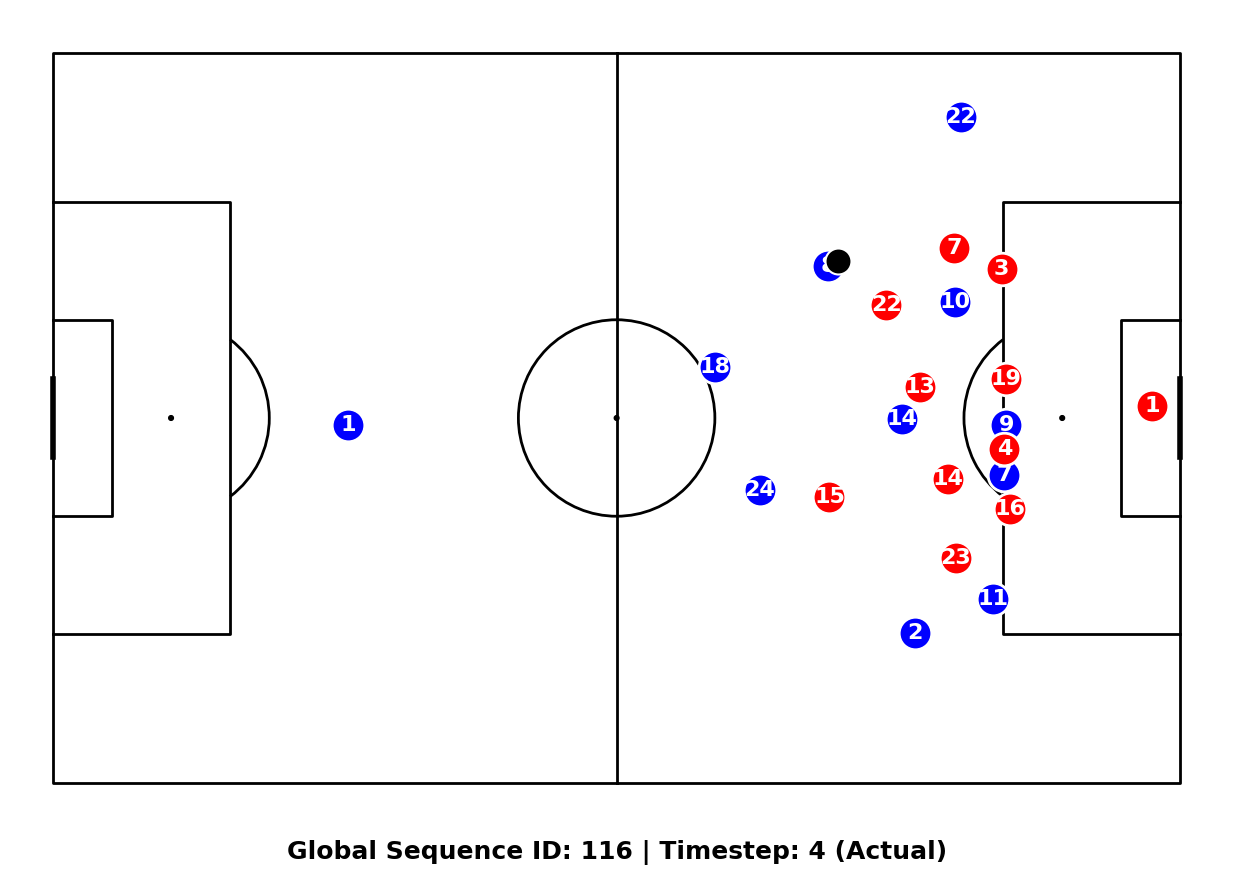

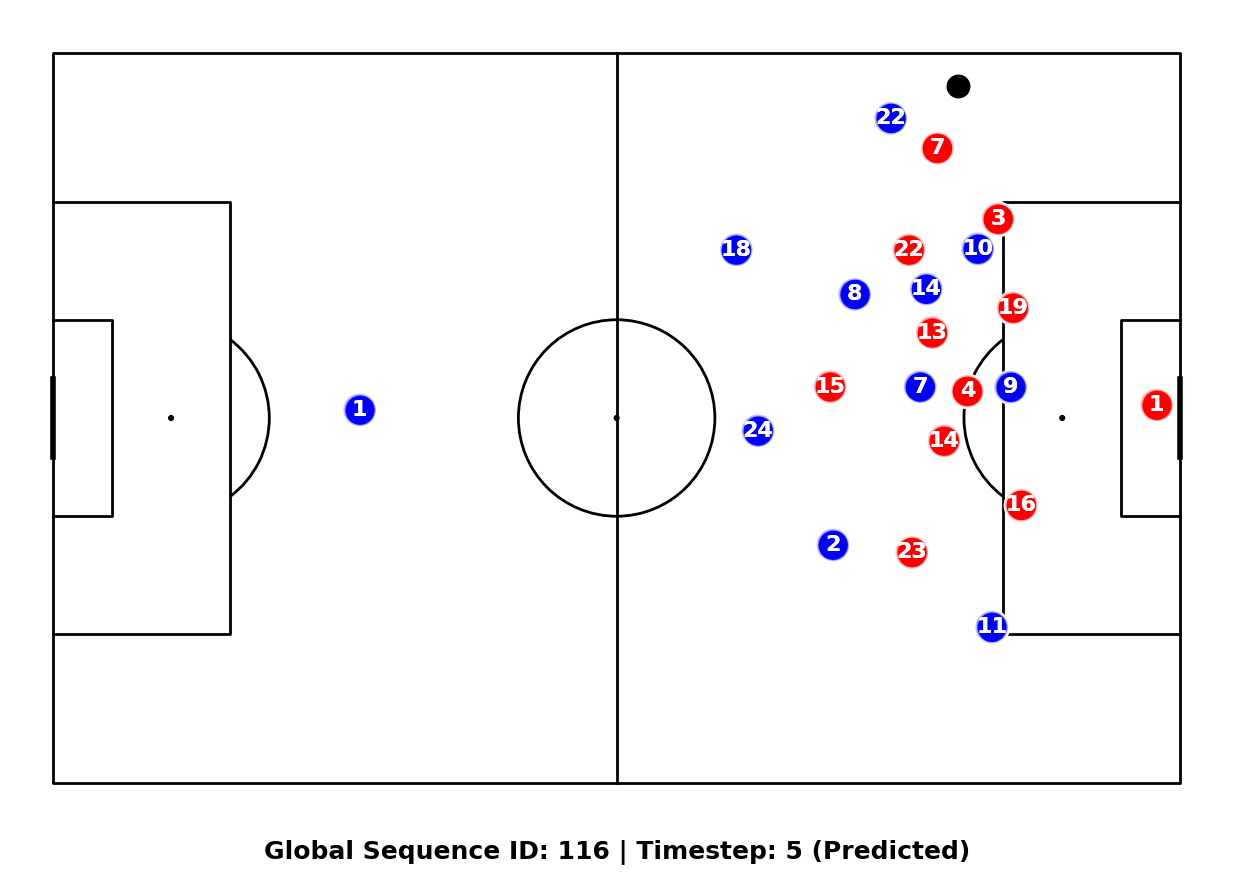

In [ ]:
!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_116 = merged_df[merged_df['global_sequence_id'] == 116].copy()

seq_116['x_plot'] = seq_116['x'] + 52.5
seq_116['y_plot'] = seq_116['y'] + 34
seq_116['ball_x_plot'] = seq_116['ball_x'] + 52.5
seq_116['ball_y_plot'] = seq_116['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if 'is_predicted' in data.columns:
        predicted_mask = data['is_predicted'] == 1
        if predicted_mask.any():
            pred_data = data[predicted_mask]
            pitch.scatter(
                pred_data['x_plot'],
                pred_data['y_plot'],
                s=550,
                color=['blue' if t == 'H' else 'red' for t in pred_data['team']],
                edgecolor='white',
                linewidth=2,
                alpha=0.5,
                ax=ax,
                zorder=3
            )
            for _, player in pred_data.iterrows():
                ax.text(
                    player['x_plot'],
                    player['y_plot'],
                    str(int(player['jerseynum'])),
                    color='white',
                    ha='center',
                    va='center',
                    fontsize=16,
                    fontweight='bold',
                    zorder=4
                )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_116[(seq_116['timestep'] == 4) & (seq_116['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 116 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_116[(seq_116['timestep'] == 5) & (seq_116['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 116 | Timestep: 5 (Predicted)"
    )

## **Pass_8_14_scenario**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/input_files/ball_features_8_14.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/input_files/possession_features_8_14.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/input_files/ball_features_8_14.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/input_files/possession_features_8_14.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_press

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 3,559 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 5.59 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 117.83it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 5.60 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 29.863163
   Test MAE: 4.430117
   Test RMSE: 5.464720
   Test R²: 0.911596

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE    RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.38169 0.764156           175
     Scenario_1_116_10 29.8

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/input_files/ball_features_8_14.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/input_files/ball_features_8_14.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed

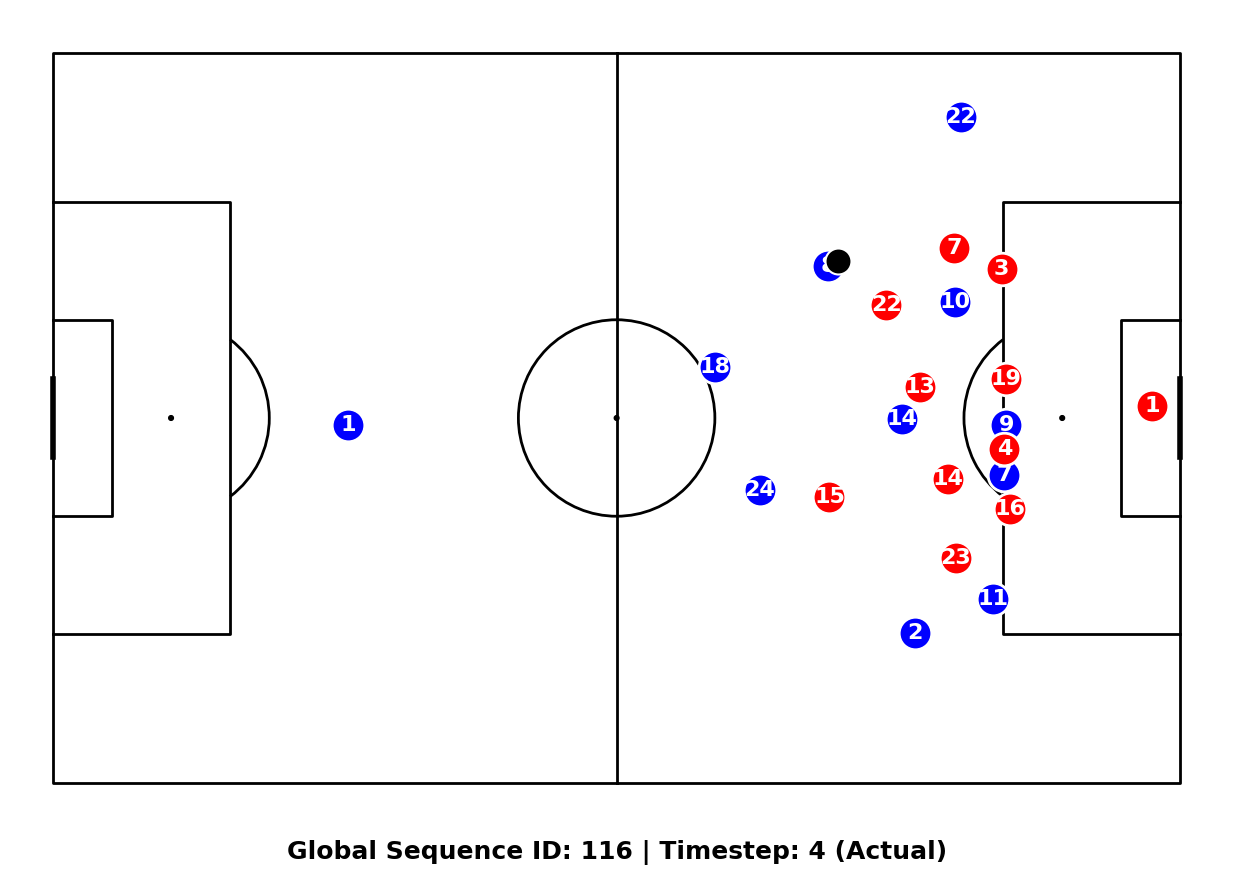

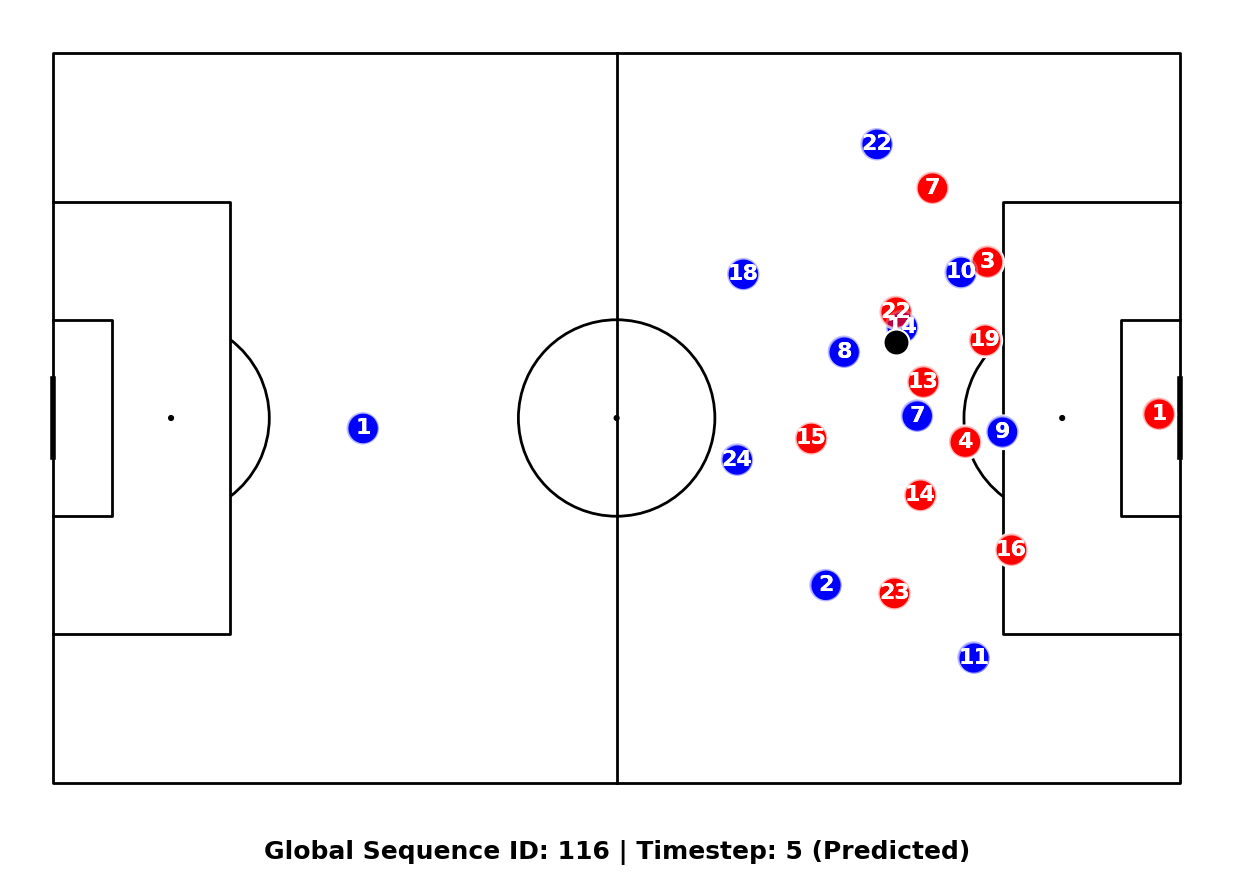

In [ ]:
!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Load the datasets with the SPECIFIED players file path as requested
players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_14_pressed/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_116 = merged_df[merged_df['global_sequence_id'] == 116].copy()

seq_116['x_plot'] = seq_116['x'] + 52.5
seq_116['y_plot'] = seq_116['y'] + 34
seq_116['ball_x_plot'] = seq_116['ball_x'] + 52.5
seq_116['ball_y_plot'] = seq_116['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if 'is_predicted' in data.columns:
        predicted_mask = data['is_predicted'] == 1
        if predicted_mask.any():
            pred_data = data[predicted_mask]
            pitch.scatter(
                pred_data['x_plot'],
                pred_data['y_plot'],
                s=550,
                color=['blue' if t == 'H' else 'red' for t in pred_data['team']],
                edgecolor='white',
                linewidth=2,
                alpha=0.5,
                ax=ax,
                zorder=3
            )
            for _, player in pred_data.iterrows():
                ax.text(
                    player['x_plot'],
                    player['y_plot'],
                    str(int(player['jerseynum'])),
                    color='white',
                    ha='center',
                    va='center',
                    fontsize=16,
                    fontweight='bold',
                    zorder=4
                )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_116[(seq_116['timestep'] == 4) & (seq_116['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 116 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_116[(seq_116['timestep'] == 5) & (seq_116['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 116 | Timestep: 5 (Predicted)"
    )

## **Pass_8_24_scenario**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/pass_8_22_actual"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/input_files/ball_features_8_24.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/input_files/possession_features_8_24.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/input_files/ball_features_8_24.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/input_files/possession_features_8_24.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Predictio

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 3,559 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 5.50 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 151.92it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 5.51 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 65.287353
   Test MAE: 6.982345
   Test RMSE: 8.080059
   Test R²: 0.806729

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE     RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.381690 0.764156           175
     Scenario_1_116_10 65

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/input_files/ball_features_8_24.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/input_files/ball_features_8_24.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/pitch_plot

📊 

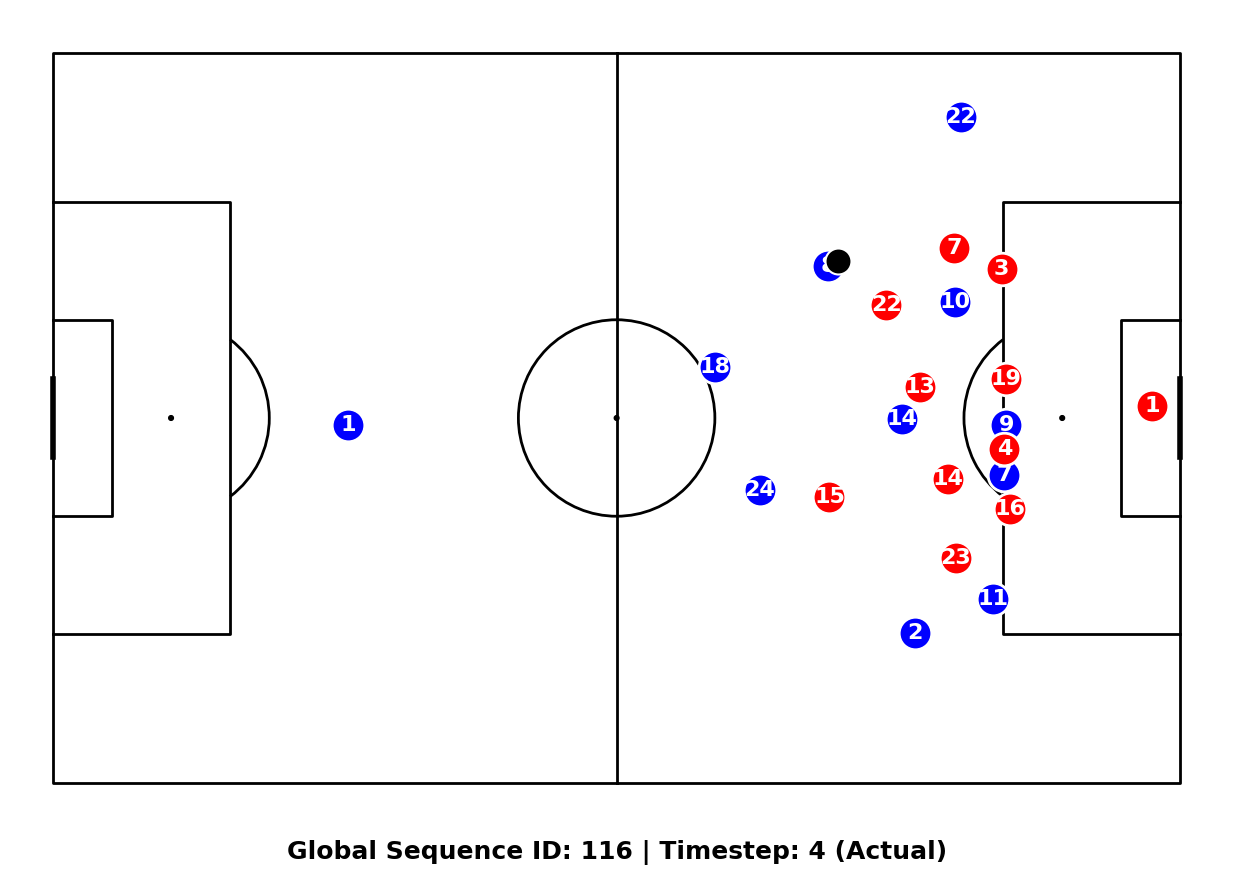

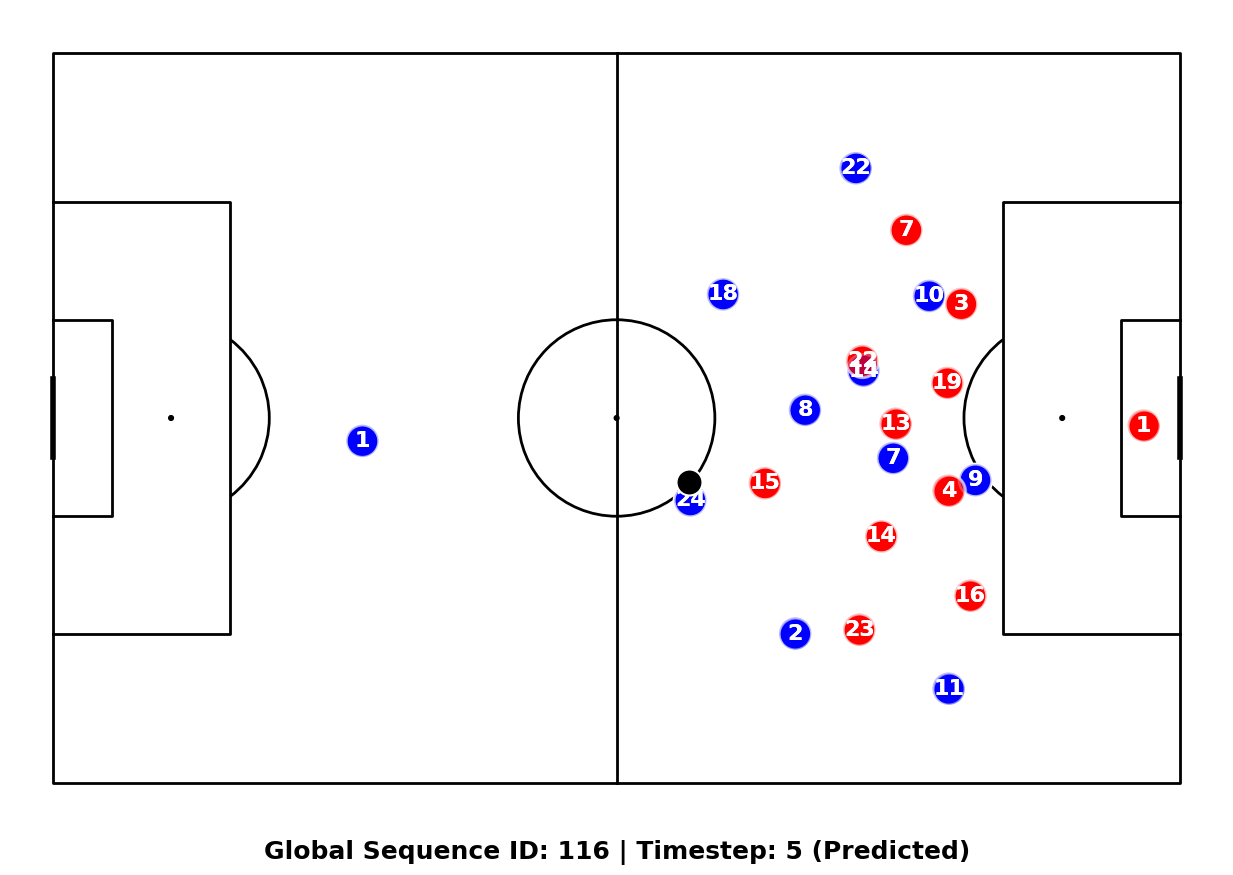

In [ ]:
!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Load the datasets with the SPECIFIED players file path as requested
players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/Prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_24_easy/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_116 = merged_df[merged_df['global_sequence_id'] == 116].copy()

seq_116['x_plot'] = seq_116['x'] + 52.5
seq_116['y_plot'] = seq_116['y'] + 34
seq_116['ball_x_plot'] = seq_116['ball_x'] + 52.5
seq_116['ball_y_plot'] = seq_116['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if 'is_predicted' in data.columns:
        predicted_mask = data['is_predicted'] == 1
        if predicted_mask.any():
            pred_data = data[predicted_mask]
            pitch.scatter(
                pred_data['x_plot'],
                pred_data['y_plot'],
                s=550,
                color=['blue' if t == 'H' else 'red' for t in pred_data['team']],
                edgecolor='white',
                linewidth=2,
                alpha=0.5,
                ax=ax,
                zorder=3
            )
            for _, player in pred_data.iterrows():
                ax.text(
                    player['x_plot'],
                    player['y_plot'],
                    str(int(player['jerseynum'])),
                    color='white',
                    ha='center',
                    va='center',
                    fontsize=16,
                    fontweight='bold',
                    zorder=4
                )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_116[(seq_116['timestep'] == 4) & (seq_116['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 116 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_116[(seq_116['timestep'] == 5) & (seq_116['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 116 | Timestep: 5 (Predicted)"
    )

## **Pass_8_11_scenario**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/input_files/ball_features_8_11.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/input_files/possession_features_8_11.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/input_files/ball_features_8_11.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/input_files/possession_features_8_11.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction

🔍

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 43 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing va

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 5.75 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 93.77it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 5.77 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 51.190907
   Test MAE: 5.829922
   Test RMSE: 7.154782
   Test R²: 0.848459

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE     RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.381690 0.764156           175
     Scenario_1_116_10 51

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/input_files/ball_features_8_11.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/input_files/ball_features_8_11.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/pitch_plot

📊 Loadi

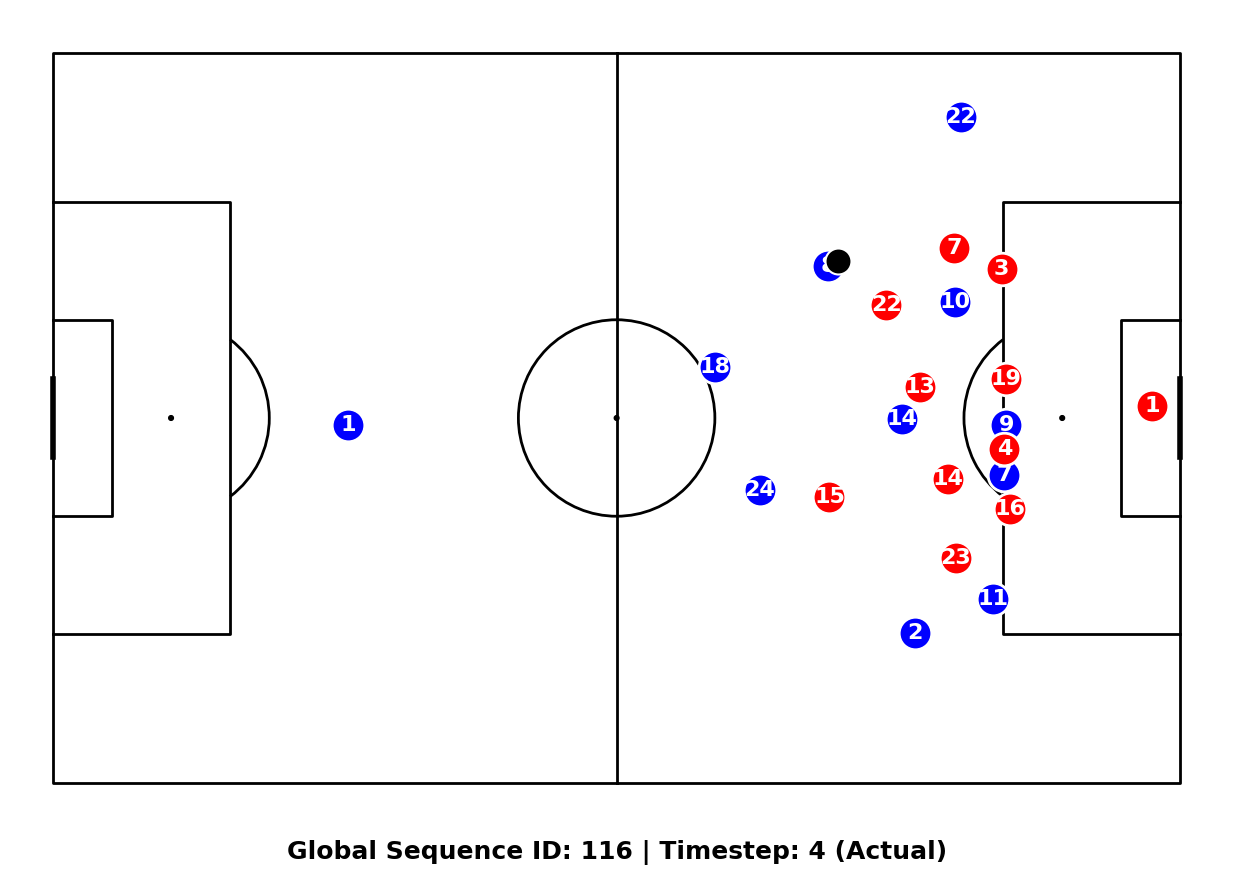

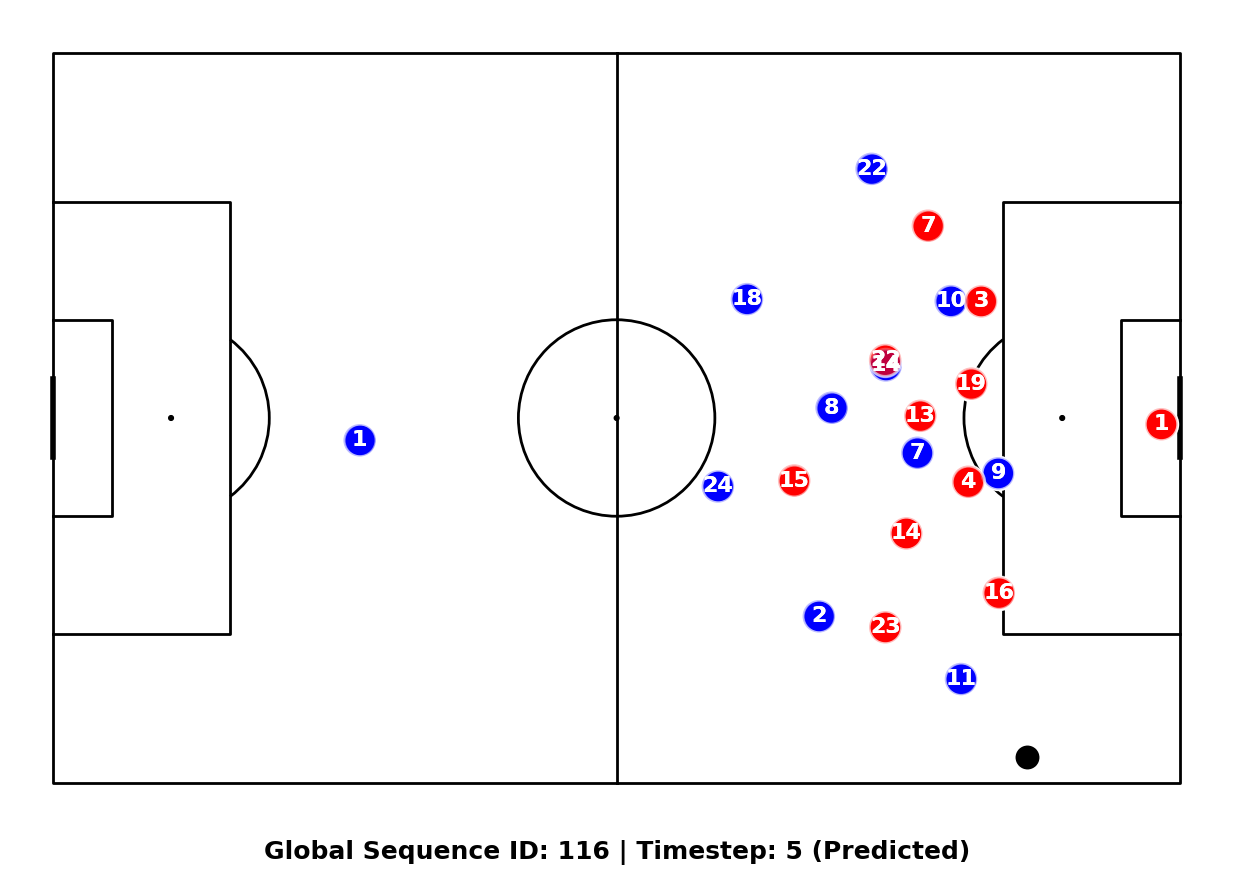

In [ ]:
!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch
# Load the datasets with the SPECIFIED players file path as requested
players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 116 different passes/Pass_8_11_out/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_116 = merged_df[merged_df['global_sequence_id'] == 116].copy()

seq_116['x_plot'] = seq_116['x'] + 52.5
seq_116['y_plot'] = seq_116['y'] + 34
seq_116['ball_x_plot'] = seq_116['ball_x'] + 52.5
seq_116['ball_y_plot'] = seq_116['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if 'is_predicted' in data.columns:
        predicted_mask = data['is_predicted'] == 1
        if predicted_mask.any():
            pred_data = data[predicted_mask]
            pitch.scatter(
                pred_data['x_plot'],
                pred_data['y_plot'],
                s=550,
                color=['blue' if t == 'H' else 'red' for t in pred_data['team']],
                edgecolor='white',
                linewidth=2,
                alpha=0.5,
                ax=ax,
                zorder=3
            )
            for _, player in pred_data.iterrows():
                ax.text(
                    player['x_plot'],
                    player['y_plot'],
                    str(int(player['jerseynum'])),
                    color='white',
                    ha='center',
                    va='center',
                    fontsize=16,
                    fontweight='bold',
                    zorder=4
                )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_116[(seq_116['timestep'] == 4) & (seq_116['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 116 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_116[(seq_116['timestep'] == 5) & (seq_116['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 116 | Timestep: 5 (Predicted)"
    )

# **Different_Passes_Types_(Intercepted , Completed , Assist then shoot)Scenarios_for_the_Same_Sequence**

## **Intersepted_pass_18_14**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/input_files/ball_features_18_14.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/input_files/possession_features_18_14.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/input_files/ball_features_18_14.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/input_files/possession_features_18_14.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/in

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 43 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing va

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 5.22 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 103.25it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 5.23 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 12.590478
   Test MAE: 2.824802
   Test RMSE: 3.548306
   Test R²: 0.935035

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE     RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.381690 0.764156           175
     Scenario_1_116_10 12

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/input_files/ball_features_18_14.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/input_files/ball_features_18_14.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/i

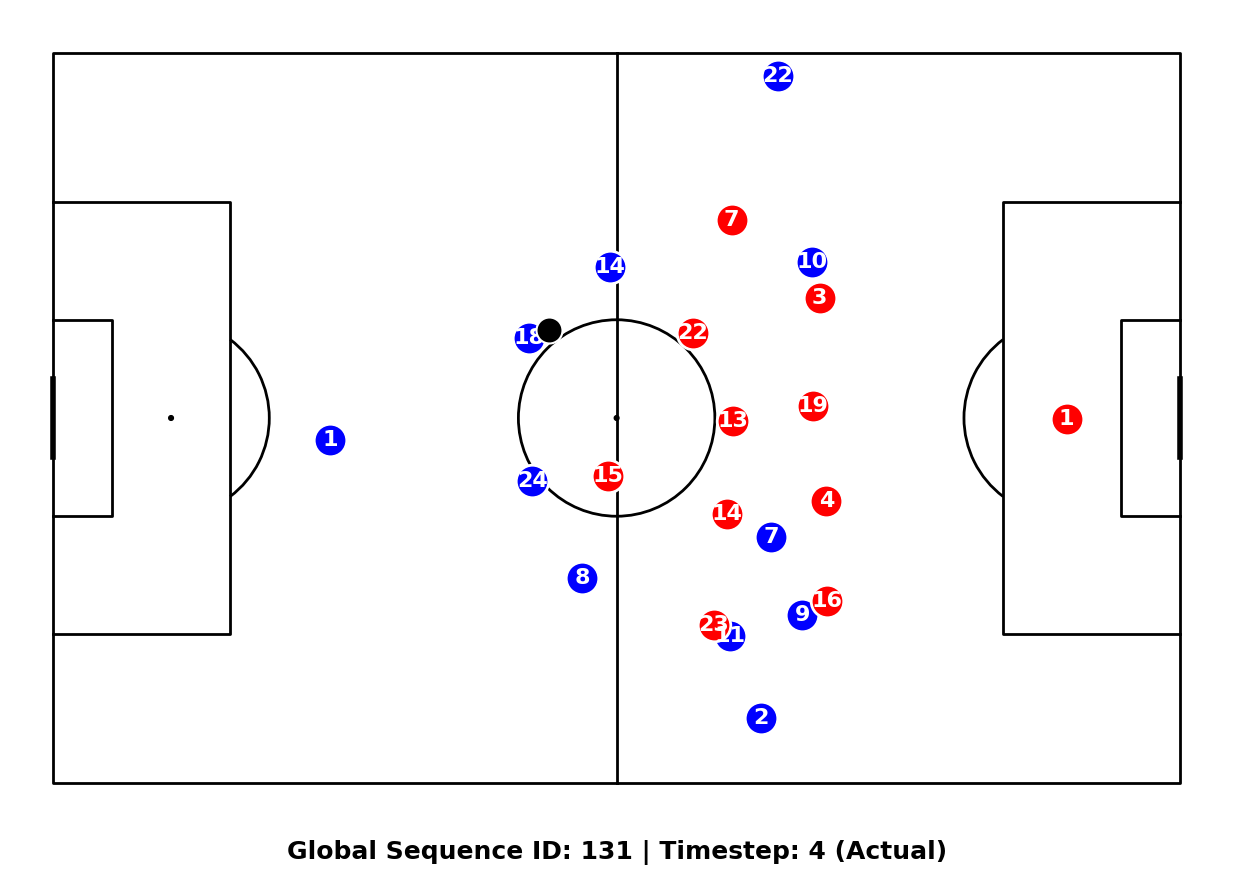

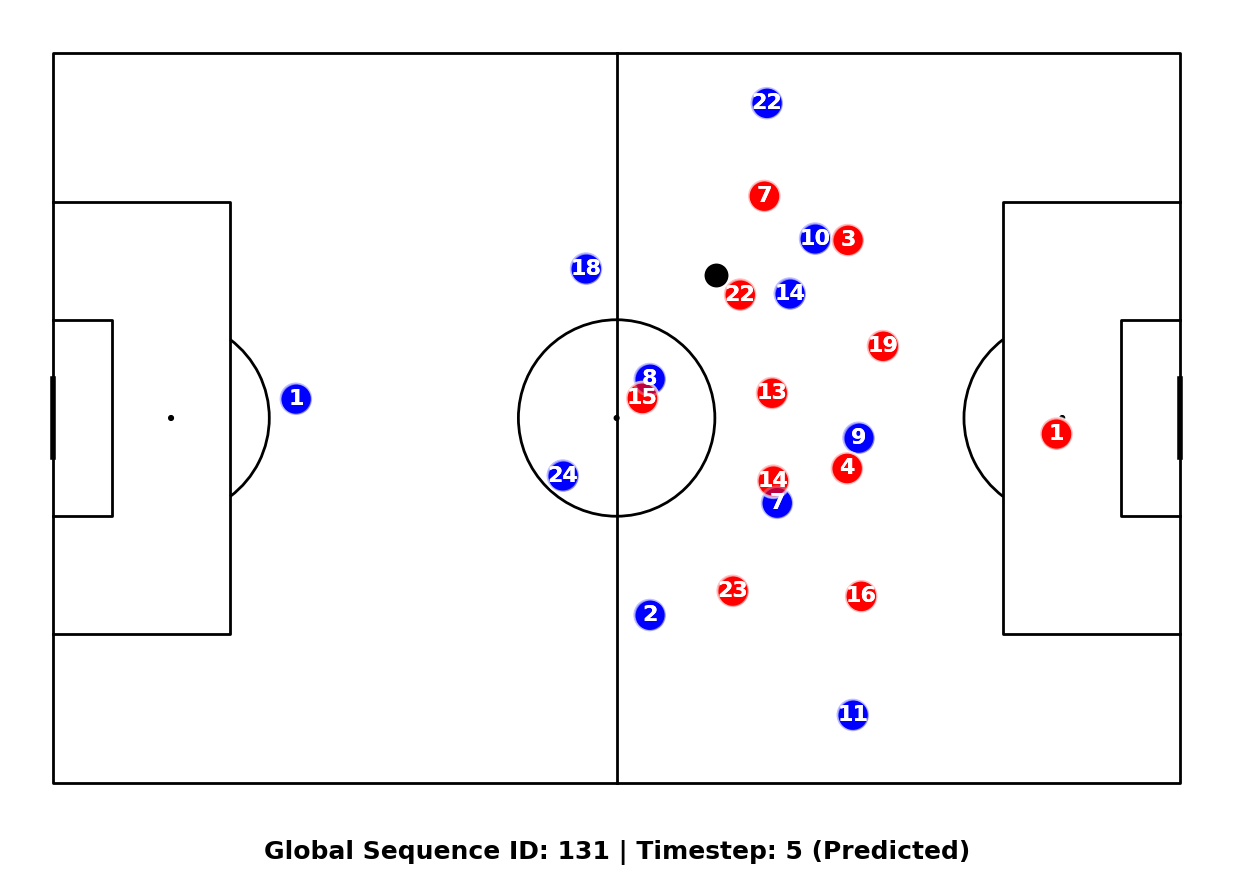

In [ ]:
# FOOTBALL PITCH VISUALIZATION

!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Load the datasets with the players file path
players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/intercepted_pass_18_14/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_131 = merged_df[merged_df['global_sequence_id'] == 131].copy()

seq_131['x_plot'] = seq_131['x'] + 52.5
seq_131['y_plot'] = seq_131['y'] + 34
seq_131['ball_x_plot'] = seq_131['ball_x'] + 52.5
seq_131['ball_y_plot'] = seq_131['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title, is_predicted=False):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if is_predicted:
        pitch.scatter(
            data['x_plot'],
            data['y_plot'],
            s=550,
            color=['blue' if t == 'H' else 'red' for t in data['team']],
            edgecolor='white',
            linewidth=2,
            alpha=0.5,
            ax=ax,
            zorder=3
        )
        for _, player in data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_131[(seq_131['timestep'] == 4) & (seq_131['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 131 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_131[(seq_131['timestep'] == 5) & (seq_131['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 131 | Timestep: 5 (Predicted)",
        is_predicted=True
    )

## **Completed_pass_18_10**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/input_files/ball_features_18_10.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/input_files/possession_features_18_10.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/input_files/ball_features_18_10.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/input_files/possession_features_18_10.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/complete

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 43 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing va

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 6.08 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 142.98it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 6.09 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 17.456324
   Test MAE: 3.070093
   Test RMSE: 4.178077
   Test R²: 0.909928

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE     RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.381690 0.764156           175
     Scenario_1_116_10 17

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/input_files/ball_features_18_10.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/input_files/ball_features_18_10.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed

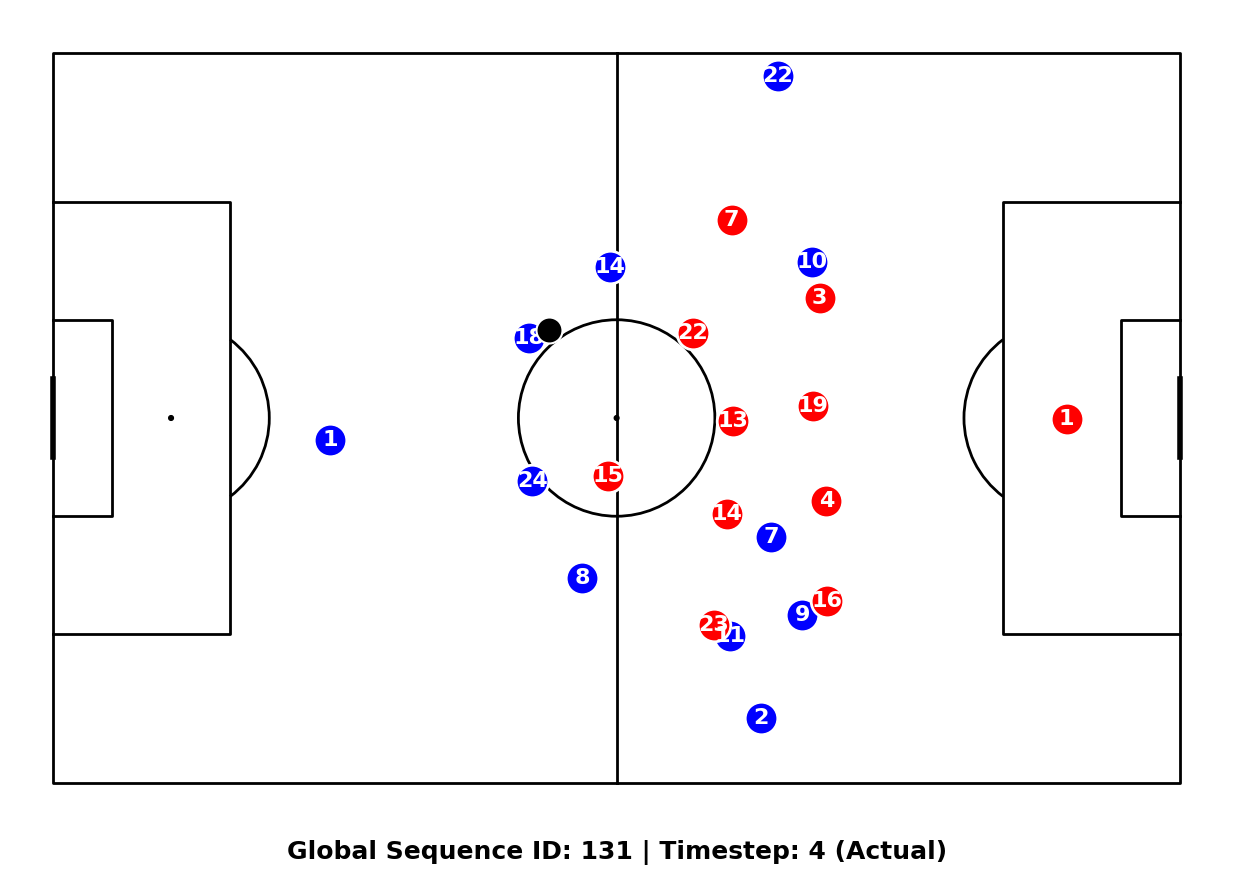

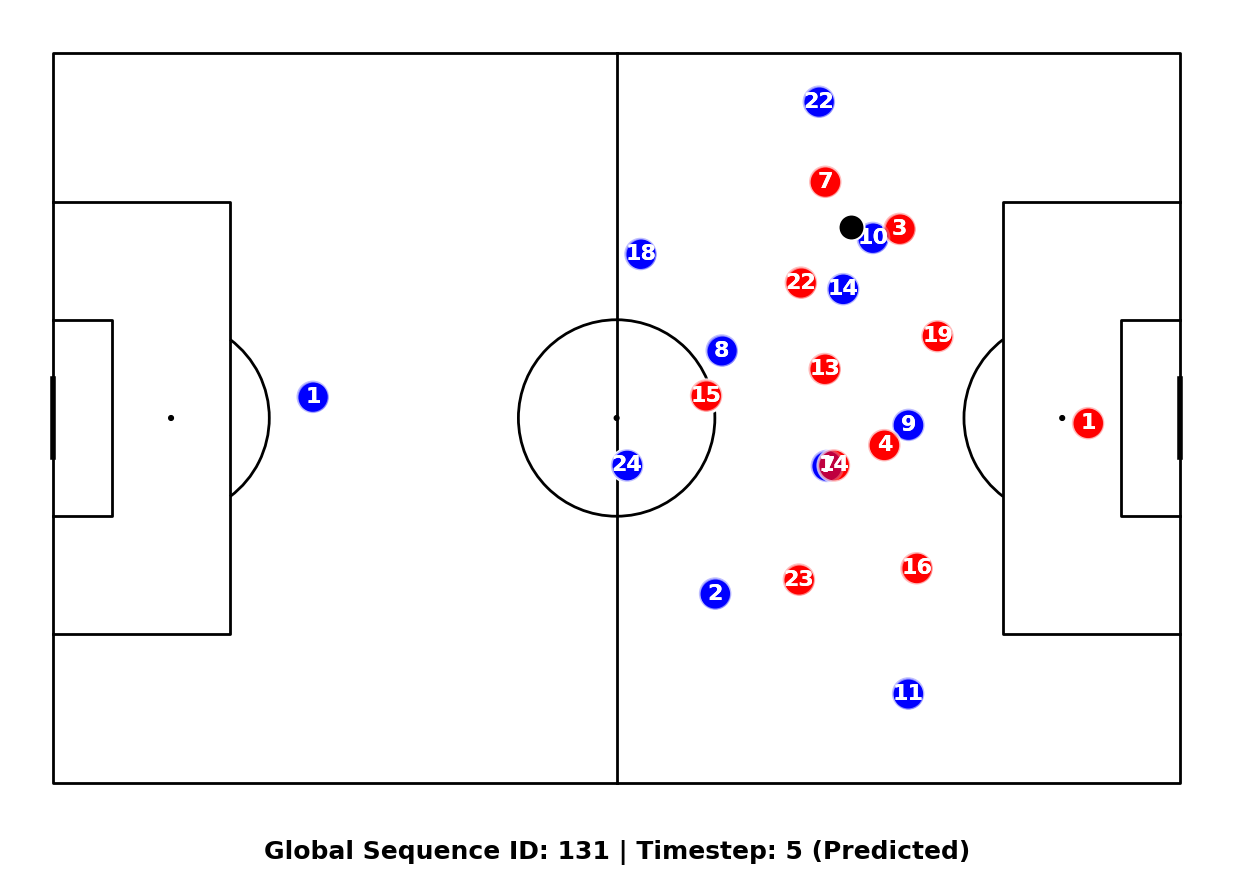

In [ ]:
# FOOTBALL PITCH VISUALIZATION

!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Load the datasets with the players file path
players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/completed_pass_18_10/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_131 = merged_df[merged_df['global_sequence_id'] == 131].copy()

seq_131['x_plot'] = seq_131['x'] + 52.5
seq_131['y_plot'] = seq_131['y'] + 34
seq_131['ball_x_plot'] = seq_131['ball_x'] + 52.5
seq_131['ball_y_plot'] = seq_131['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title, is_predicted=False):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if is_predicted:
        pitch.scatter(
            data['x_plot'],
            data['y_plot'],
            s=550,
            color=['blue' if t == 'H' else 'red' for t in data['team']],
            edgecolor='white',
            linewidth=2,
            alpha=0.5,
            ax=ax,
            zorder=3
        )
        for _, player in data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_131[(seq_131['timestep'] == 4) & (seq_131['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 131 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_131[(seq_131['timestep'] == 5) & (seq_131['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 131 | Timestep: 5 (Predicted)",
        is_predicted=True
    )

## **Assist_pass_18_9**

### **Model_Prediction_Time-step_#5**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime

print("== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==")

# Mount Google Drive
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define dataset paths for scenario_1_116_10
base_path_scenario_1_116_10 = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9"

# scenario_1_116_10 data file paths
ball_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/input_files/ball_features_18_9.csv"
players_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv"
possession_scenario_1_116_10_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/input_files/possession_features_18_9.csv"

# Output save path for scenario_1_116_10 evaluation
output_base_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction"

print("\n📁 Scenario_1_116_10 Data File Paths:")
print(f"Ball features path: {ball_scenario_1_116_10_path}")
print(f"Players features path: {players_scenario_1_116_10_path}")
print(f"Possession features path: {possession_scenario_1_116_10_path}")
print(f"Output save path: {output_base_path}")

# Create output directory structure
os.makedirs(output_base_path, exist_ok=True)
os.makedirs(os.path.join(output_base_path, "predictions"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "training_artifacts"), exist_ok=True)
os.makedirs(os.path.join(output_base_path, "visualizations"), exist_ok=True)
print(f"\n✅ Output directory structure created at: {output_base_path}")

# Check GPU availability
print("\n🔍 GPU Availability Check:")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print(f"  ✅ {len(gpus)} GPU(s) available for evaluation")
    for i, gpu in enumerate(gpus):
        print(f"     GPU {i}: {gpu}")

    # Set memory growth to prevent TensorFlow from allocating all GPU memory at once
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("  ✅ GPU memory growth enabled")
    except RuntimeError as e:
        print(f"  ❌ Error setting memory growth: {e}")
else:
    print("  ❌ No GPU available, using CPU for evaluation")

# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
print(f"\n🌱 Random seed set to {seed} for reproducibility")

# Load V4 France fine-tuned model
print("\n🧠 Loading V4 France fine-tuned model for scenario_1_116_10 evaluation...")
model_path =  "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_83_val_loss_60.284939.keras"


try:
    scenario_1_116_10_model = tf.keras.models.load_model(model_path)
    print(f"   ✅ Model loaded successfully from: {model_path}")

    # Verify model architecture
    print("\n✅ Model architecture verification:")
    print(f"   Input shape: {scenario_1_116_10_model.input_shape}")
    print(f"   Output shape: {scenario_1_116_10_model.output_shape}")
    print(f"   Total parameters: {scenario_1_116_10_model.count_params():,}")

    # Save model summary
    model_summary_path = os.path.join(output_base_path, "training_artifacts", "v4_france_model_summary.txt")
    with open(model_summary_path, 'w') as f:
        scenario_1_116_10_model.summary(print_fn=lambda x: f.write(x + '\n'))
    print(f"   📝 Model summary saved to: {model_summary_path}")

except Exception as e:
    print(f"   ❌ Error loading model: {e}")
    raise

# Verify model can handle expected input shape
expected_input_shape = (None, 4, 62)  # batch_size, timesteps, features
if scenario_1_116_10_model.input_shape != expected_input_shape:
    print(f"   ⚠️  WARNING: Model input shape {scenario_1_116_10_model.input_shape} doesn't match expected {expected_input_shape}")
    print("   This may cause errors during scenario_1_116_10 evaluation")

# Verify output shape
expected_output_shape = (None, 44)  # batch_size, player coordinates
if scenario_1_116_10_model.output_shape != expected_output_shape:
    print(f"   ⚠️  WARNING: Model output shape {scenario_1_116_10_model.output_shape} doesn't match expected {expected_output_shape}")

print("\n✅ STEP 1 COMPLETE: Environment setup and model loading finished")
print("Ready for next step: Scenario_1_116_10 data loading and validation")
print(f"\n📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning")
print("All spatial coordinates used as-is (no normalization applied)")
print("Missing players handled with (-500, -500) coordinates as in training")
print("Batch size for evaluation: 64 (same as training)")

== STEP 1: ENVIRONMENT SETUP & MODEL LOADING FOR SCENARIOS EVALUATION ==
Google Drive already mounted

📁 Scenario_1_116_10 Data File Paths:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/input_files/ball_features_18_9.csv
Players features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/Players_Features/Normalized_Ordered_France_Team_Only.csv
Possession features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/input_files/possession_features_18_9.csv
Output save path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction

✅ Output directory structure created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/predi

   📝 Model summary saved to: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction/training_artifacts/v4_france_model_summary.txt

✅ STEP 1 COMPLETE: Environment setup and model loading finished
Ready for next step: Scenario_1_116_10 data loading and validation

📊 Next step will process scenario_1_116_10 data using identical logic to France fine-tuning
All spatial coordinates used as-is (no normalization applied)
Missing players handled with (-500, -500) coordinates as in training
Batch size for evaluation: 64 (same as training)


In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==")
start_time = time.time()

# 1. Load scenario_1_116_10 possession features dataset
print("\n📊 Loading scenario_1_116_10 possession features dataset...")
scenario_1_116_10_sequence_df = pd.read_csv(
    possession_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'passerplayerid': 'float32',  # Use float32 to handle NaN values
        'receiverplayerid': 'float32',  # Use float32 to handle NaN values
        'passtype': 'int8',
        'passoutcometype': 'int8',
        'pressuretype': 'int8',
        'sequence_id': 'int32',
        'timestep': 'int8',
        'global_sequence_id': 'int32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'teamname', 'teamattackingdirection', 'passerplayerid', 'receiverplayerid',
             'passtype', 'passoutcometype', 'pressuretype', 'timestep', 'global_sequence_id', 'sequence_id']
)

print(f"   ✅ Scenario_1_116_10 possession features loaded: {len(scenario_1_116_10_sequence_df):,} rows, {scenario_1_116_10_sequence_df.shape[1]} columns")

# 2. Load scenario_1_116_10 ball features dataset
print("\n⚽ Loading scenario_1_116_10 ball features dataset...")
scenario_1_116_10_ball_df = pd.read_csv(
    ball_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'ball_x': 'float32',
        'ball_y': 'float32',
        'ball_z': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'ball_x', 'ball_y', 'ball_z']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 ball features loaded: {len(scenario_1_116_10_ball_df):,} rows, {scenario_1_116_10_ball_df.shape[1]} columns")

# 3. Load scenario_1_116_10 players features dataset
print("\n👥 Loading scenario_1_116_10 players features dataset...")
scenario_1_116_10_players_df = pd.read_csv(
    players_scenario_1_116_10_path,
    dtype={
        'gameid': 'int32',
        'gameeventid': 'int32',
        'possessioneventid': 'int32',
        'sequence': 'int32',
        'period': 'int8',
        'jerseynum': 'int8',
        'playerid': 'int32',
        'positiongrouptype': 'category',
        'x': 'float32',
        'y': 'float32'
    },
    usecols=['gameid', 'gameeventid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'jerseynum', 'team', 'visibility', 'confidence', 'x', 'y', 'playerid', 'positiongrouptype']  # No sequence_id in this file
)

print(f"   ✅ Scenario_1_116_10 players features loaded: {len(scenario_1_116_10_players_df):,} rows, {scenario_1_116_10_players_df.shape[1]} columns")

# 4. Data validation and basic statistics (identical to training logic)
print("\n🔍 Data validation and basic statistics:")

# Create the five join keys for all datasets
print("   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...")
scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys created successfully")

# Check for missing values in critical columns
print("\n   Missing values check:")
critical_columns = ['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period', 'global_sequence_id']
for col in critical_columns:
    if col in scenario_1_116_10_sequence_df.columns:
        missing_count = scenario_1_116_10_sequence_df[col].isna().sum()
        print(f"     Scenario_1_116_10 Sequence {col}: {missing_count} missing values")

# Calculate unique game-sequence combinations for scenario_1_116_10 possessions
print("\n   🔍 Calculating unique scenario_1_116_10 possessions using (gameid, sequence) composite key...")
scenario_1_116_10_sequence_df['game_sequence_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (row['gameid'], row['sequence']), axis=1)
unique_scenario_1_116_10_game_sequences = scenario_1_116_10_sequence_df['game_sequence_key'].nunique()
unique_scenario_1_116_10_global_sequences = scenario_1_116_10_sequence_df['global_sequence_id'].nunique()
total_scenario_1_116_10_timesteps = len(scenario_1_116_10_sequence_df)

print(f"\n   📊 Scenario_1_116_10 dataset summary:")
print(f"     Unique global sequences: {unique_scenario_1_116_10_global_sequences:,} (globally unique 5-timestep sequences)")
print(f"     Unique game-sequence combinations: {unique_scenario_1_116_10_game_sequences:,} (unique scenario_1_116_10 possessions)")
print(f"     Total timesteps: {total_scenario_1_116_10_timesteps:,}")
print(f"     Average timesteps per global sequence: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_global_sequences:.1f}")
print(f"     Average timesteps per possession: {total_scenario_1_116_10_timesteps/unique_scenario_1_116_10_game_sequences:.1f}")

# Check global_sequence_id distribution
scenario_1_116_10_global_seq_counts = scenario_1_116_10_sequence_df['global_sequence_id'].value_counts()
min_timesteps = scenario_1_116_10_global_seq_counts.min()
max_timesteps = scenario_1_116_10_global_seq_counts.max()
avg_timesteps = scenario_1_116_10_global_seq_counts.mean()

print(f"\n   🔢 Scenario_1_116_10 global sequence distribution:")
print(f"     Min timesteps per global sequence: {min_timesteps}")
print(f"     Max timesteps per global sequence: {max_timesteps}")
print(f"     Avg timesteps per global sequence: {avg_timesteps:.1f}")

# Check for the expected 5 timesteps per global sequence
scenario_1_116_10_expected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts == 5].shape[0]
scenario_1_116_10_unexpected_sequences = scenario_1_116_10_global_seq_counts[scenario_1_116_10_global_seq_counts != 5].shape[0]

print(f"\n   ⚠️ Scenario_1_116_10 global sequence validation (expecting 5 timesteps per sequence):")
print(f"     Sequences with exactly 5 timesteps: {scenario_1_116_10_expected_sequences:,} ({scenario_1_116_10_expected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")
print(f"     Sequences with unexpected timestep count: {scenario_1_116_10_unexpected_sequences:,} ({scenario_1_116_10_unexpected_sequences/unique_scenario_1_116_10_global_sequences*100:.1f}%)")

if scenario_1_116_10_unexpected_sequences > 0:
    print("     🚨 WARNING: Some scenario_1_116_10 global sequences don't have exactly 5 timesteps!")
    print("            This may cause issues during evaluation.")

# Store scenario_1_116_10 datasets for next steps
SCENARIO_1_116_10_DATA = {
    'sequence_df': scenario_1_116_10_sequence_df,
    'ball_df': scenario_1_116_10_ball_df,
    'players_df': scenario_1_116_10_players_df
}

total_time = time.time() - start_time
print(f"\n✅ STEP 2 COMPLETE: Scenario_1_116_10 data loading and validation finished")
print(f"   ✅ All scenario_1_116_10 datasets loaded successfully")
print(f"   ✅ Basic validation completed with CORRECTED sequence counting")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Feature engineering and sequence construction for scenario_1_116_10 data")
print("Note: All spatial coordinates used as-is (no normalization applied)")
print("✅ Using identical logic to France fine-tuning for feature extraction")


== STEP 2: SCENARIO_1_116_10 DATA LOADING AND VALIDATION ==

📊 Loading scenario_1_116_10 possession features dataset...
   ✅ Scenario_1_116_10 possession features loaded: 5 rows, 16 columns

⚽ Loading scenario_1_116_10 ball features dataset...
   ✅ Scenario_1_116_10 ball features loaded: 43 rows, 9 columns

👥 Loading scenario_1_116_10 players features dataset...
   ✅ Scenario_1_116_10 players features loaded: 83,908 rows, 14 columns

🔍 Data validation and basic statistics:
   🔑 Creating five join keys (gameid, possessioneventid, eventtime, sequence, period)...
   ✅ Five join keys created successfully

   Missing values check:
     Scenario_1_116_10 Sequence gameid: 0 missing values
     Scenario_1_116_10 Sequence possessioneventid: 0 missing values
     Scenario_1_116_10 Sequence eventtime: 0 missing values
     Scenario_1_116_10 Sequence sequence: 0 missing values
     Scenario_1_116_10 Sequence period: 0 missing values
     Scenario_1_116_10 Sequence global_sequence_id: 0 missing va

In [ ]:
import time
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

print("\n== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==")
start_time = time.time()

# 1. Create lookup dictionaries for faster joins (identical to France fine-tuning logic)
print("\n🔧 Creating lookup dictionaries for faster data joining...")
start_sub = time.time()

# Create ball lookup dictionary: five_key -> ball features
scenario_1_116_10_ball_lookup = SCENARIO_1_116_10_DATA['ball_df'].set_index('five_key')[['ball_x', 'ball_y', 'ball_z']].to_dict('index')

# Create players lookup dictionary: five_key -> player positions
scenario_1_116_10_players_grouped = {}
for key, group in SCENARIO_1_116_10_DATA['players_df'].groupby('five_key'):
    scenario_1_116_10_players_grouped[key] = group[['x', 'y', 'playerid', 'positiongrouptype', 'jerseynum', 'team']].to_dict('records')

# Create next timestep lookup for temporal context
# First, sort by global_sequence_id and timestep
scenario_1_116_10_sequence_df_sorted = SCENARIO_1_116_10_DATA['sequence_df'].sort_values(['global_sequence_id', 'timestep'])
# Create shifted columns for next timestep within the same global sequence
scenario_1_116_10_sequence_df_sorted['next_timestep'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['timestep'].shift(-1)
scenario_1_116_10_sequence_df_sorted['next_eventtime'] = scenario_1_116_10_sequence_df_sorted.groupby('global_sequence_id')['eventtime'].shift(-1)

# Create lookup for next timestep context
scenario_1_116_10_next_timestep_lookup = {}
for idx, row in scenario_1_116_10_sequence_df_sorted.iterrows():
    if not pd.isna(row['next_timestep']) and row['next_timestep'] == row['timestep'] + 1:
        current_key = (
            row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
        )
        next_key = (
            row['gameid'], row['possessioneventid'], row['next_eventtime'], row['sequence'], row['period']
        )
        scenario_1_116_10_next_timestep_lookup[current_key] = {
            'next_ball_key': next_key,
            'next_passerplayerid': row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1,
            'next_receiverplayerid': row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1
        }

sub_time = time.time() - start_sub
print(f"   ✅ Lookup dictionaries built in {sub_time:.2f} seconds")

# 2. Get unique global sequences for scenario_1_116_10 data (already validated to have exactly 5 timesteps)
print("\n📊 Getting unique scenario_1_116_10 global sequences...")
unique_scenario_1_116_10_global_sequences = SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'].unique()
print(f"   📂 Total unique scenario_1_116_10 global sequences: {len(unique_scenario_1_116_10_global_sequences):,}")

# 3. Feature engineering with validation - CORRECTED: Hard check sequence count matching
print("\n⚙️ Engineering features for scenario_1_116_10 sequence of 5...")
start_sub = time.time()

# Initialize storage for scenario_1_116_10 sequences
X_scenario_1_116_10_sequences = []  # Input sequences (4 timesteps × 62 features)
y_scenario_1_116_10_sequences = []  # Target sequences (44 player coordinates for timestep 5)
valid_scenario_1_116_10_global_sequences = []  # Store valid global sequence IDs

# Create progress bar for sequence processing
seq_progress = tqdm(total=len(unique_scenario_1_116_10_global_sequences), desc="Building scenario_1_116_10 sequences", position=0, leave=True)

# Track global sequences that will be processed
processed_global_sequences = []

for global_seq_id in unique_scenario_1_116_10_global_sequences:
    # Get all timesteps for this global sequence
    seq_data = SCENARIO_1_116_10_DATA['sequence_df'][SCENARIO_1_116_10_DATA['sequence_df']['global_sequence_id'] == global_seq_id].sort_values('timestep')

    # Validate we have exactly 5 timesteps
    if len(seq_data) != 5:
        seq_progress.update(1)
        continue

    # Prepare input features (timesteps 1-4) and target (timestep 5)
    input_features = []
    has_missing_data = False

    # Process timesteps 1-4 for input
    for timestep in range(1, 5):  # Timesteps 1-4 for input
        row = seq_data[seq_data['timestep'] == timestep].iloc[0]

        # Create the five-key tuple for joining
        key = (row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period'])

        # Get ball features with fallback
        ball_features = scenario_1_116_10_ball_lookup.get(key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

        # Get player positions (44 features) with fallback
        player_positions = scenario_1_116_10_players_grouped.get(key, [])
        if len(player_positions) < 22:
            # Handle missing players by using (-500, -500) as default coordinates
            player_coords = np.zeros(44)
            for i in range(22):
                player_coords[i*2] = -500.0
                player_coords[i*2 + 1] = -500.0
            has_missing_data = True
        else:
            # Extract x,y coordinates for all 22 players in order
            player_coords = np.zeros(44)
            for i, player in enumerate(player_positions[:22]):  # Take first 22 players
                player_coords[i*2] = player['x']
                player_coords[i*2 + 1] = player['y']

        # Get event features (8 features)
        passer_id = row['passerplayerid'] if not pd.isna(row['passerplayerid']) else -1
        receiver_id = row['receiverplayerid'] if not pd.isna(row['receiverplayerid']) else -1

        # Get passer and receiver coordinates with fallback
        passer_coords = (-500.0, -500.0)  # Default for missing
        receiver_coords = (-500.0, -500.0)  # Default for missing

        if len(player_positions) >= 22:
            # Find passer and receiver in the player positions
            for player in player_positions:
                if player['playerid'] == passer_id:
                    passer_coords = (player['x'], player['y'])
                if player['playerid'] == receiver_id:
                    receiver_coords = (player['x'], player['y'])

        event_features = [
            row['passtype'] if not pd.isna(row['passtype']) else 0,
            row['passoutcometype'] if not pd.isna(row['passoutcometype']) else 0,
            row['pressuretype'] if not pd.isna(row['pressuretype']) else 0,
            row['period'],
            passer_coords[0], passer_coords[1],
            receiver_coords[0], receiver_coords[1]
        ]

        # Get next timestep context (7 features) for the next timestep in the sequence
        next_context = [0.0, 0.0, 0.0, -500.0, -500.0, -500.0, -500.0]  # Default values

        if key in scenario_1_116_10_next_timestep_lookup:
            next_info = scenario_1_116_10_next_timestep_lookup[key]
            next_ball_key = next_info['next_ball_key']
            next_ball = scenario_1_116_10_ball_lookup.get(next_ball_key, {'ball_x': 0.0, 'ball_y': 0.0, 'ball_z': 0.0})

            # Get next passer/receiver coordinates
            next_passer_coords = (-500.0, -500.0)
            next_receiver_coords = (-500.0, -500.0)

            if next_ball_key in scenario_1_116_10_players_grouped and len(scenario_1_116_10_players_grouped[next_ball_key]) >= 22:
                next_players = scenario_1_116_10_players_grouped[next_ball_key]
                for player in next_players:
                    if player['playerid'] == next_info['next_passerplayerid']:
                        next_passer_coords = (player['x'], player['y'])
                    if player['playerid'] == next_info['next_receiverplayerid']:
                        next_receiver_coords = (player['x'], player['y'])

            next_context = [
                next_ball['ball_x'], next_ball['ball_y'], next_ball['ball_z'],
                next_passer_coords[0], next_passer_coords[1],
                next_receiver_coords[0], next_receiver_coords[1]
            ]

        # Combine all features (44 + 8 + 3 + 7 = 62 features)
        timestep_features = np.concatenate([
            player_coords,
            event_features,
            [ball_features['ball_x'], ball_features['ball_y'], ball_features['ball_z']],
            next_context
        ])

        input_features.append(timestep_features)

    # Get target (timestep 5 player positions)
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    target_key = (timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
                 timestep5_row['sequence'], timestep5_row['period'])

    target_players = scenario_1_116_10_players_grouped.get(target_key, [])
    if len(target_players) >= 22 and not has_missing_data:
        target_coords = np.zeros(44)
        for i, player in enumerate(target_players[:22]):
            target_coords[i*2] = player['x']
            target_coords[i*2 + 1] = player['y']

        X_scenario_1_116_10_sequences.append(np.array(input_features))  # Shape: (4, 62)
        y_scenario_1_116_10_sequences.append(target_coords)  # Shape: (44,)
        valid_scenario_1_116_10_global_sequences.append(global_seq_id)
        processed_global_sequences.append(global_seq_id)

    seq_progress.update(1)

seq_progress.close()
sub_time = time.time() - start_sub
print(f"   ✅ Features engineered for {len(X_scenario_1_116_10_sequences):,}/{len(unique_scenario_1_116_10_global_sequences):,} scenario_1_116_10 sequences ({len(X_scenario_1_116_10_sequences)/len(unique_scenario_1_116_10_global_sequences)*100:.1f}%)")
print(f"   ⏱️  Feature engineering time: {sub_time:.2f} seconds")

# 4. Convert to numpy arrays and validate shapes - CORRECTED: Hard validation
print("\n📊 Converting to numpy arrays and validating shapes...")
X_scenario_1_116_10 = np.array(X_scenario_1_116_10_sequences)  # Shape: (num_sequences, 4, 62)
y_scenario_1_116_10 = np.array(y_scenario_1_116_10_sequences)  # Shape: (num_sequences, 44)

print(f"\n✅ Final scenario_1_116_10 dataset shapes:")
print(f"   Input (X_scenario_1_116_10): {X_scenario_1_116_10.shape} - (sequences, timesteps, features)")
print(f"   Target (y_scenario_1_116_10): {y_scenario_1_116_10.shape} - (sequences, player_coordinates)")
print(f"   Features per timestep: {X_scenario_1_116_10.shape[2]} (should be 62)")
print(f"   Player coordinates: {y_scenario_1_116_10.shape[1]} (should be 44)")

# HARD VALIDATION: Ensure we processed the expected number of sequences
expected_sequences = len(unique_scenario_1_116_10_global_sequences)  # Use actual count from dataset
actual_sequences = len(X_scenario_1_116_10_sequences)
print(f"\n🔍 HARD SEQUENCE VALIDATION:")
print(f"   Expected global sequences: {expected_sequences:,}")
print(f"   Actually processed: {actual_sequences:,}")
print(f"   Processing rate: {actual_sequences/expected_sequences*100:.1f}%")

if actual_sequences < expected_sequences * 0.95:  # Less than 95% processed
    print("   ⚠️  WARNING: Significant sequence loss during feature engineering!")
    print(f"   Lost {expected_sequences - actual_sequences:,} sequences")
    print("   Check for missing player data or other filtering issues")

# Validate feature count
assert X_scenario_1_116_10.shape[2] == 62, f"Expected 62 features per timestep, got {X_scenario_1_116_10.shape[2]}"
assert y_scenario_1_116_10.shape[1] == 44, f"Expected 44 target coordinates, got {y_scenario_1_116_10.shape[1]}"

# Store for next steps
SCENARIO_1_116_10_SEQUENCE_DATA = {
    'X': X_scenario_1_116_10,
    'y': y_scenario_1_116_10,
    'valid_global_sequences': valid_scenario_1_116_10_global_sequences,
    'sequence_df': SCENARIO_1_116_10_DATA['sequence_df'],
    'processed_global_sequences': processed_global_sequences
}

total_time = time.time() - start_time
print(f"\n✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished")
print(f"   ✅ Successfully processed {len(X_scenario_1_116_10_sequences):,} valid scenario_1_116_10 sequences")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Model inference and prediction generation for scenario_1_116_10 data")
print("Note: Using identical logic to France fine-tuning for feature extraction")
print("✅ Hard validation ensures sequence count consistency")


== STEP 3: FEATURE ENGINEERING AND SEQUENCE CONSTRUCTION FOR SCENARIO_1_116_10 EVALUATION ==

🔧 Creating lookup dictionaries for faster data joining...
   ✅ Lookup dictionaries built in 6.21 seconds

📊 Getting unique scenario_1_116_10 global sequences...
   📂 Total unique scenario_1_116_10 global sequences: 1

⚙️ Engineering features for scenario_1_116_10 sequence of 5...


Building scenario_1_116_10 sequences: 100%|██████████| 1/1 [00:00<00:00, 165.08it/s]

   ✅ Features engineered for 1/1 scenario_1_116_10 sequences (100.0%)
   ⏱️  Feature engineering time: 0.01 seconds

📊 Converting to numpy arrays and validating shapes...

✅ Final scenario_1_116_10 dataset shapes:
   Input (X_scenario_1_116_10): (1, 4, 62) - (sequences, timesteps, features)
   Target (y_scenario_1_116_10): (1, 44) - (sequences, player_coordinates)
   Features per timestep: 62 (should be 62)
   Player coordinates: 44 (should be 44)

🔍 HARD SEQUENCE VALIDATION:
   Expected global sequences: 1
   Actually processed: 1
   Processing rate: 100.0%

✅ STEP 3 COMPLETE: Scenario_1_116_10 feature engineering and sequence construction finished
   ✅ Successfully processed 1 valid scenario_1_116_10 sequences
   ⏱️  Total execution time: 6.23 seconds

Next step: Model inference and prediction generation for scenario_1_116_10 data
Note: Using identical logic to France fine-tuning for feature extraction
✅ Hard validation ensures sequence count consistency


In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from tqdm import tqdm
import os
from datetime import datetime
import json

print("\n== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==")
start_time = time.time()

# 1. Generate predictions for scenario_1_116_10 data using the pre-trained model
print("\n🔮 Generating predictions for scenario_1_116_10 data...")
print(f"   Model input shape: {scenario_1_116_10_model.input_shape}")
print(f"   Scenario_1_116_10 data shape: {SCENARIO_1_116_10_SEQUENCE_DATA['X'].shape}")
print(f"   Batch size for inference: 64 (same as training)")

scenario_1_116_10_predictions = scenario_1_116_10_model.predict(
    SCENARIO_1_116_10_SEQUENCE_DATA['X'],
    batch_size=64,  # Same batch size as training
    verbose=1
)

print(f"   ✅ Predictions generated: {scenario_1_116_10_predictions.shape}")

# 2. Load V4 France fine-tuned model metrics for comparison
print("\n📊 Loading V4 France fine-tuned model performance metrics...")
v4_france_metrics_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/training_artifacts/v4_performance_metrics.json"

try:
    with open(v4_france_metrics_path, 'r') as f:
        v4_france_metrics = json.load(f)
    print(f"   ✅ V4 France metrics loaded: MSE={v4_france_metrics['mse']:.4f}, MAE={v4_france_metrics['mae']:.4f}, R²={v4_france_metrics['r2']:.4f}")

except Exception as e:
    print(f"   ⚠️  Error loading V4 France metrics: {e}")
    print("   Using hardcoded V4 France values from previous evaluation")
    v4_france_metrics = {
        'mse': 70.2527,
        'mae': 5.9597,
        'r2': 0.7642
    }

# 3. Create the five join keys for data merging (recreate if needed)
print("\n🔑 Recreating five join keys for scenario_1_116_10 data integrity...")
scenario_1_116_10_sequence_df = SCENARIO_1_116_10_DATA['sequence_df']
scenario_1_116_10_ball_df = SCENARIO_1_116_10_DATA['ball_df']
scenario_1_116_10_players_df = SCENARIO_1_116_10_DATA['players_df']

scenario_1_116_10_sequence_df['five_key'] = scenario_1_116_10_sequence_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_ball_df['five_key'] = scenario_1_116_10_ball_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

scenario_1_116_10_players_df['five_key'] = scenario_1_116_10_players_df.apply(lambda row: (
    row['gameid'], row['possessioneventid'], row['eventtime'], row['sequence'], row['period']
), axis=1)

print("   ✅ Five join keys recreated successfully")

# 4. Get scenario_1_116_10 test sequences and create test files
print("\n📁 Creating scenario_1_116_10 test files with original structure...")

# 4.1 Get processed sequence data
scenario_1_116_10_test_global_ids = SCENARIO_1_116_10_SEQUENCE_DATA['processed_global_sequences']
scenario_1_116_10_test_sequence_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
scenario_1_116_10_test_five_keys = scenario_1_116_10_test_sequence_data['five_key'].unique()

# 4.2 Ball features test data
scenario_1_116_10_test_ball_data = scenario_1_116_10_ball_df[scenario_1_116_10_ball_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
ball_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "ball_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(ball_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_ball_data.to_csv(ball_scenario_1_116_10_path, index=False)
print(f"   ⚽ Ball features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_ball_data)} rows")

# 4.3 Possession features test data
scenario_1_116_10_test_possession_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'].isin(scenario_1_116_10_test_global_ids)]
possession_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "possession_features_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(possession_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_possession_data.to_csv(possession_scenario_1_116_10_path, index=False)
print(f"   📋 Possession features scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_possession_data)} rows")

# 4.4 Players test data
scenario_1_116_10_test_players_data = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'].isin(scenario_1_116_10_test_five_keys)]
players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "players_scenario_1_116_10_test.csv")
os.makedirs(os.path.dirname(players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_test_players_data.to_csv(players_scenario_1_116_10_path, index=False)
print(f"   👥 Players scenario_1_116_10 test data saved: {len(scenario_1_116_10_test_players_data)} rows")

# 5. Create predicted players CSV with complete structure
print("\n🎯 Creating predicted players CSV with complete structure including sequence column...")

# Create list to store prediction rows
scenario_1_116_10_prediction_rows = []

# Create progress bar
progress = tqdm(total=len(scenario_1_116_10_test_global_ids), desc="Building scenario_1_116_10 prediction CSV", position=0, leave=True)

for i, global_seq_id in enumerate(scenario_1_116_10_test_global_ids):
    # Get sequence data for this global sequence
    seq_data = scenario_1_116_10_sequence_df[scenario_1_116_10_sequence_df['global_sequence_id'] == global_seq_id].sort_values('timestep')

    if len(seq_data) != 5:  # Sequence of 5 has 5 timesteps
        progress.update(1)
        continue

    # Get predicted coordinates for timestep 5
    predicted_coords = scenario_1_116_10_predictions[i]

    # Process each timestep (1-4) for actual data
    for timestep in range(1, 5):  # Timesteps 1-4 for actual data
        timestep_row = seq_data[seq_data['timestep'] == timestep].iloc[0]
        key = (
            timestep_row['gameid'], timestep_row['possessioneventid'], timestep_row['eventtime'],
            timestep_row['sequence'], timestep_row['period']
        )

        # Get player data for this timestep
        players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

        if len(players_for_timestep) < 22:
            continue

        # Add actual player positions (22 players per timestep) with ALL required columns
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row for this player's event
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],  # Using eventtime as starttime
                'endtime': matching_seq_row['eventtime'],    # Using eventtime as endtime
                'duration': 0.0,  # Default duration
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': timestep,
                'global_sequence_id': timestep_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 actual data
    timestep5_row = seq_data[seq_data['timestep'] == 5].iloc[0]
    key = (
        timestep5_row['gameid'], timestep5_row['possessioneventid'], timestep5_row['eventtime'],
        timestep5_row['sequence'], timestep5_row['period']
    )

    players_for_timestep = scenario_1_116_10_players_df[scenario_1_116_10_players_df['five_key'] == key]

    if len(players_for_timestep) >= 22:
        for _, player_row in players_for_timestep.head(22).iterrows():
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': player_row['x'],
                'y': player_row['y'],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 0,
                'data_type': 'actual',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    # Add timestep 5 predicted data
    if len(players_for_timestep) >= 22:
        for j in range(22):
            player_row = players_for_timestep.iloc[j]
            # Get matching sequence row
            matching_seq_row = scenario_1_116_10_sequence_df[
                (scenario_1_116_10_sequence_df['gameid'] == player_row['gameid']) &
                (scenario_1_116_10_sequence_df['possessioneventid'] == player_row['possessioneventid']) &
                (scenario_1_116_10_sequence_df['eventtime'] == player_row['eventtime']) &
                (scenario_1_116_10_sequence_df['sequence'] == player_row['sequence']) &
                (scenario_1_116_10_sequence_df['period'] == player_row['period'])
            ].iloc[0] if not scenario_1_116_10_sequence_df.empty else timestep5_row

            row_dict = {
                'gameid': player_row['gameid'],
                'gameeventid': matching_seq_row['gameeventid'],
                'possessioneventid': matching_seq_row['possessioneventid'],
                'starttime': matching_seq_row['eventtime'],
                'endtime': matching_seq_row['eventtime'],
                'duration': 0.0,
                'eventtime': matching_seq_row['eventtime'],
                'sequence': matching_seq_row['sequence'],
                'playerid': player_row['playerid'],
                'positiongrouptype': player_row['positiongrouptype'],
                'jerseynum': player_row['jerseynum'],
                'team': player_row['team'],
                'x': predicted_coords[j*2],
                'y': predicted_coords[j*2 + 1],
                'visibility': player_row['visibility'],
                'confidence': player_row['confidence'],
                'possessioneventtype': matching_seq_row.get('possessioneventtype', 'PA'),
                'teamattackingdirection': matching_seq_row.get('teamattackingdirection', 'R'),
                'period': matching_seq_row['period'],
                'teamname': matching_seq_row.get('teamname', 'Unknown'),
                'is_predicted': 1,
                'data_type': 'predicted',
                'sequence_id': matching_seq_row['sequence_id'],
                'timestep': 5,
                'global_sequence_id': timestep5_row['global_sequence_id']
            }
            scenario_1_116_10_prediction_rows.append(row_dict)

    progress.update(1)

progress.close()

# 6. Create and save prediction DataFrame with ALL required columns
print("\n💾 Saving predicted players CSV with complete column structure...")
scenario_1_116_10_prediction_df = pd.DataFrame(scenario_1_116_10_prediction_rows)

# Define EXACT column order as requested
required_columns = [
    'gameid', 'gameeventid', 'possessioneventid', 'starttime', 'endtime', 'duration', 'eventtime', 'sequence',
    'playerid', 'positiongrouptype', 'jerseynum', 'team', 'x', 'y', 'visibility', 'confidence',
    'possessioneventtype', 'teamattackingdirection', 'period', 'teamname',
    'is_predicted', 'data_type', 'sequence_id', 'timestep', 'global_sequence_id'
]

# Ensure all required columns exist with proper defaults
for col in required_columns:
    if col not in scenario_1_116_10_prediction_df.columns:
        if col in ['gameid', 'gameeventid', 'possessioneventid', 'playerid', 'jerseynum', 'period', 'sequence', 'sequence_id', 'timestep', 'global_sequence_id', 'is_predicted']:
            scenario_1_116_10_prediction_df[col] = 0
        elif col in ['x', 'y', 'starttime', 'endtime', 'duration']:
            scenario_1_116_10_prediction_df[col] = 0.0
        elif col in ['positiongrouptype', 'team', 'visibility', 'confidence', 'possessioneventtype', 'teamattackingdirection', 'teamname', 'data_type']:
            scenario_1_116_10_prediction_df[col] = 'Unknown'
        else:
            scenario_1_116_10_prediction_df[col] = 'missing'

# Reorder columns to EXACT required structure
scenario_1_116_10_prediction_df = scenario_1_116_10_prediction_df[required_columns]

predicted_players_scenario_1_116_10_path = os.path.join(output_base_path, "predictions", "predicted_players_scenario_1_116_10.csv")
os.makedirs(os.path.dirname(predicted_players_scenario_1_116_10_path), exist_ok=True)
scenario_1_116_10_prediction_df.to_csv(predicted_players_scenario_1_116_10_path, index=False)
print(f"   ✅ Predicted players scenario_1_116_10 CSV saved: {len(scenario_1_116_10_prediction_df)} rows")
print(f"      • Actual data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])}")
print(f"      • Predicted data rows: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])}")
print(f"      • Columns included: {', '.join(scenario_1_116_10_prediction_df.columns)}")

# 7. Calculate comprehensive metrics for scenario_1_116_10 data
print("\n📈 Calculating comprehensive metrics for scenario_1_116_10 data...")

def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    r2 = r2_score(y_true.flatten(), y_pred.flatten())
    return {
        'mse': float(mse),
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2)
    }

scenario_1_116_10_metrics = calculate_metrics(SCENARIO_1_116_10_SEQUENCE_DATA['y'], scenario_1_116_10_predictions)

print("\n📊 Scenario_1_116_10 Performance Metrics:")
print(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.6f}")
print(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.6f}")
print(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.6f}")
print(f"   Test R²: {scenario_1_116_10_metrics['r2']:.6f}")

# 8. Create performance comparison with V4 France fine-tuned model
print("\n📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10")

# Create comparison DataFrame
performance_comparison = pd.DataFrame({
    'Team': ['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
    'MSE': [v4_france_metrics['mse'], scenario_1_116_10_metrics['mse']],
    'MAE': [v4_france_metrics['mae'], scenario_1_116_10_metrics['mae']],
    'RMSE': [np.sqrt(v4_france_metrics['mse']), scenario_1_116_10_metrics['rmse']],
    'R²': [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
    'Dataset Size': [175, len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])]
})

print("\n📊 Performance Comparison Table:")
print(performance_comparison.to_string(index=False))

# Calculate performance differences
mse_diff = scenario_1_116_10_metrics['mse'] - v4_france_metrics['mse']
mae_diff = scenario_1_116_10_metrics['mae'] - v4_france_metrics['mae']
r2_diff = scenario_1_116_10_metrics['r2'] - v4_france_metrics['r2']

print(f"\n🔍 Performance Difference Analysis:")
if mse_diff > 0:
    print(f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
elif mse_diff < 0:
    print(f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)")
else:
    print(f"   MSE unchanged: 0.00 (0.0%)")

if mae_diff > 0:
    print(f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
elif mae_diff < 0:
    print(f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)")
else:
    print(f"   MAE unchanged: 0.00 (0.0%)")

if r2_diff > 0:
    print(f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
elif r2_diff < 0:
    print(f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)")
else:
    print(f"   R² unchanged: 0.0000 (0.0%)")

# 9. Save metrics and create visualizations
print("\n🎨 Creating analysis visualizations and reports...")

# Save performance metrics
metrics_path = os.path.join(output_base_path, "training_artifacts", "performance_metrics.json")
os.makedirs(os.path.dirname(metrics_path), exist_ok=True)
with open(metrics_path, 'w') as f:
    json.dump(scenario_1_116_10_metrics, f, indent=2)
print(f"   💾 Performance metrics saved to: {metrics_path}")

# Save comparison table
comparison_csv_path = os.path.join(output_base_path, "training_artifacts", "performance_comparison.csv")
os.makedirs(os.path.dirname(comparison_csv_path), exist_ok=True)
performance_comparison.to_csv(comparison_csv_path, index=False)
print(f"   💾 Performance comparison table saved to: {comparison_csv_path}")

# Create error analysis visualization
plt.figure(figsize=(15, 6))

# Calculate errors for scenario_1_116_10 data
errors = np.abs(SCENARIO_1_116_10_SEQUENCE_DATA['y'] - scenario_1_116_10_predictions)
player_errors = errors.reshape(-1, 22, 2)  # (samples, players, coordinates)
avg_player_errors = np.mean(player_errors, axis=(0, 2))  # Average error per player

plt.subplot(1, 2, 1)
plt.bar(range(1, 23), avg_player_errors, color='skyblue')
plt.title('Average Error per Player Position (Scenario_1_116_10 Data)')
plt.xlabel('Player Position (1-22)')
plt.ylabel('MAE')
plt.xticks(range(1, 23), [f'P{i}' for i in range(1, 23)], rotation=45)

plt.subplot(1, 2, 2)
all_errors = errors.flatten()
plt.hist(all_errors, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(all_errors), color='red', linestyle='dashed', linewidth=2, label=f'Mean: {np.mean(all_errors):.2f}')
plt.title('Error Distribution (Scenario_1_116_10 Data)')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
error_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_error_analysis.png")
os.makedirs(os.path.dirname(error_path), exist_ok=True)
plt.savefig(error_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Error analysis visualization saved to: {error_path}")
plt.close()

# Create comparison visualization
plt.figure(figsize=(15, 6))

# Plot 1: MSE and MAE comparison
plt.subplot(1, 2, 1)
metrics_to_plot = ['MSE', 'MAE']
x = np.arange(len(metrics_to_plot))
width = 0.35

france_values = [v4_france_metrics['mse'], v4_france_metrics['mae']]
scenario_1_116_10_values = [scenario_1_116_10_metrics['mse'], scenario_1_116_10_metrics['mae']]

plt.bar(x - width/2, france_values, width, label='France (V4 Fine-Tuned)', color='blue', alpha=0.7)
plt.bar(x + width/2, scenario_1_116_10_values, width, label='Scenario_1_116_10', color='purple', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Performance Comparison: V4 France vs Scenario_1_116_10')
plt.xticks(x, metrics_to_plot)
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: R² comparison
plt.subplot(1, 2, 2)
plt.bar(['France (V4 Fine-Tuned)', 'Scenario_1_116_10'],
        [v4_france_metrics['r2'], scenario_1_116_10_metrics['r2']],
        color=['blue', 'purple'], alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('R² Comparison')
plt.grid(True, alpha=0.3)

plt.tight_layout()
comparison_plot_path = os.path.join(output_base_path, "visualizations", "performance_comparison.png")
os.makedirs(os.path.dirname(comparison_plot_path), exist_ok=True)
plt.savefig(comparison_plot_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Performance comparison visualization saved to: {comparison_plot_path}")
plt.close()

# 10. Generate pitch visualization with actual vs predicted for scenario_1_116_10 data
plt.figure(figsize=(20, 8))

# Select a few representative scenario_1_116_10 sequences to visualize
num_examples = min(4, len(scenario_1_116_10_test_global_ids))
example_indices = np.random.choice(len(scenario_1_116_10_test_global_ids), num_examples, replace=False)

for idx, example_idx in enumerate(example_indices):
    global_seq_id = scenario_1_116_10_test_global_ids[example_idx]
    actual_coords = SCENARIO_1_116_10_SEQUENCE_DATA['y'][example_idx]
    pred_coords = scenario_1_116_10_predictions[example_idx]

    ax = plt.subplot(1, num_examples, idx+1)

    # Create pitch
    ax.set_xlim(-55, 55)
    ax.set_ylim(-35, 35)
    ax.set_aspect('equal')
    ax.set_title(f'Scenario_1_116_10 Sequence {global_seq_id}', fontsize=10)

    # Draw pitch markings
    ax.plot([-52.5, 52.5], [-34, -34], 'k-')  # Bottom
    ax.plot([-52.5, 52.5], [34, 34], 'k-')    # Top
    ax.plot([-52.5, -52.5], [-34, 34], 'k-')  # Left
    ax.plot([52.5, 52.5], [-34, 34], 'k-')    # Right
    ax.plot([0, 0], [-34, 34], 'k--')        # Center line

    # Plot actual positions (blue)
    actual_x = actual_coords[::2]
    actual_y = actual_coords[1::2]
    ax.scatter(actual_x[:11], actual_y[:11], c='blue', s=50, alpha=0.7, label='Actual Home')
    ax.scatter(actual_x[11:], actual_y[11:], c='red', s=50, alpha=0.7, label='Actual Away')

    # Plot predicted positions (green)
    pred_x = pred_coords[::2]
    pred_y = pred_coords[1::2]
    ax.scatter(pred_x[:11], pred_y[:11], c='lightgreen', s=50, marker='x', label='Predicted Home')
    ax.scatter(pred_x[11:], pred_y[11:], c='pink', s=50, marker='x', label='Predicted Away')

    # Draw error vectors
    for j in range(22):
        dx = pred_x[j] - actual_x[j]
        dy = pred_y[j] - actual_y[j]
        ax.arrow(actual_x[j], actual_y[j], dx, dy, color='black', alpha=0.5, width=0.1)

    # Turn off axis ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
pitch_path = os.path.join(output_base_path, "visualizations", "scenario_1_116_10_actual_vs_predicted_formations.png")
os.makedirs(os.path.dirname(pitch_path), exist_ok=True)
plt.savefig(pitch_path, dpi=300, bbox_inches='tight')
print(f"   ✅ Pitch visualization saved to: {pitch_path}")
plt.close()

# 11. Generate comprehensive analysis report for scenario_1_116_10 data
print("\n📝 Generating comprehensive analysis report for scenario_1_116_10 data...")

report_path = os.path.join(output_base_path, "training_artifacts", f"scenario_1_116_10_analysis_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.txt")
os.makedirs(os.path.dirname(report_path), exist_ok=True)

with open(report_path, 'w') as f:
    f.write("="*80 + "\n")
    f.write("SCENARIO_1_116_10 FORMATION PREDICTION - COMPREHENSIVE ANALYSIS REPORT\n")
    f.write("="*80 + "\n\n")

    f.write(f"Report generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n\n")

    f.write("MODEL INFORMATION:\n")
    f.write("-"*50 + "\n")
    f.write(f"V4 France fine-tuned model loaded from: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/All Stages/France/V4_Baseline_Model_Fine_Tunned_France/model_checkpoints/v4_best_model_epoch_57_val_loss_63.725880.keras\n")
    f.write(f"Model input shape: (None, 4, 62)\n")
    f.write(f"Model output shape: (None, 44)\n")
    f.write(f"Total parameters: 167,404\n")
    f.write(f"Batch size used for inference: 64\n\n")

    f.write("SCENARIO_1_116_10 DATA SUMMARY:\n")
    f.write("-"*50 + "\n")
    f.write(f"Total unique global sequences: {len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):,}\n")
    f.write(f"Total timesteps processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df']):,}\n")
    f.write(f"Average timesteps per possession: {len(SCENARIO_1_116_10_SEQUENCE_DATA['sequence_df'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences']):.1f}\n")
    f.write(f"Sequences successfully processed: {len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])} ({len(SCENARIO_1_116_10_SEQUENCE_DATA['X'])/len(SCENARIO_1_116_10_SEQUENCE_DATA['valid_global_sequences'])*100:.1f}%)\n\n")

    f.write("PERFORMANCE COMPARISON: V4 FRANCE FINE-TUNED MODEL vs SCENARIO_1_116_10\n")
    f.write("-"*50 + "\n")
    f.write("V4 France Fine-Tuned Model (Performance on France):\n")
    f.write(f"   Test MSE: {v4_france_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {v4_france_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {np.sqrt(v4_france_metrics['mse']):.4f}\n")
    f.write(f"   Test R²: {v4_france_metrics['r2']:.4f}\n\n")

    f.write("Scenario_1_116_10 Performance (using V4 France model):\n")
    f.write(f"   Test MSE: {scenario_1_116_10_metrics['mse']:.4f}\n")
    f.write(f"   Test MAE: {scenario_1_116_10_metrics['mae']:.4f}\n")
    f.write(f"   Test RMSE: {scenario_1_116_10_metrics['rmse']:.4f}\n")
    f.write(f"   Test R²: {scenario_1_116_10_metrics['r2']:.4f}\n\n")

    # Performance change analysis
    performance_change_text = "Performance Change:\n"
    performance_change_text += "-"*50 + "\n"

    # MSE change
    if mse_diff > 0:
        performance_change_text += f"   MSE degradation: +{mse_diff:.2f} (+{(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    elif mse_diff < 0:
        performance_change_text += f"   MSE improvement: {mse_diff:.2f} ({(mse_diff/v4_france_metrics['mse'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MSE unchanged: 0.00 (0.0%)\n"

    # MAE change
    if mae_diff > 0:
        performance_change_text += f"   MAE degradation: +{mae_diff:.2f} (+{(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    elif mae_diff < 0:
        performance_change_text += f"   MAE improvement: {mae_diff:.2f} ({(mae_diff/v4_france_metrics['mae'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   MAE unchanged: 0.00 (0.0%)\n"

    # R² change
    if r2_diff > 0:
        performance_change_text += f"   R² improvement: +{r2_diff:.4f} (+{(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    elif r2_diff < 0:
        performance_change_text += f"   R² degradation: {r2_diff:.4f} ({(r2_diff/v4_france_metrics['r2'])*100:.1f}%)\n"
    else:
        performance_change_text += f"   R² unchanged: 0.0000 (0.0%)\n\n"

    f.write(performance_change_text)

    # Key Insights
    insights_text = "Key Insights:\n"
    insights_text += "-"*50 + "\n"

    if mse_diff > 0 and mae_diff > 0 and r2_diff < 0:
        insights_text += "• The model shows reduced performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This indicates the scenario_1_116_10 differs from France's tactical patterns\n"
        insights_text += "• Model generalization to this specific scenario requires further investigation\n"
    elif mse_diff < 0 and mae_diff < 0 and r2_diff > 0:
        insights_text += "• The model shows improved performance on scenario_1_116_10 data compared to France\n"
        insights_text += "• This suggests the scenario_1_116_10 aligns well with France's training data\n"
        insights_text += "• The model generalizes effectively to this scenario\n"
    else:
        insights_text += "• Mixed performance on scenario_1_116_10 data compared to France\n"
        if mse_diff > 0:
            insights_text += "• MSE degradation suggests higher variance in prediction errors\n"
        if mae_diff < 0:
            insights_text += "• MAE improvement indicates more consistent prediction accuracy\n"
        if r2_diff > 0:
            insights_text += "• R² improvement shows better explanation of formation variance\n"
        insights_text += "• Further analysis needed to understand performance patterns\n"

    insights_text += f"• Spatial interpretation: {scenario_1_116_10_metrics['mae']:.2f} MAE = ~{(scenario_1_116_10_metrics['mae'] * 0.68):.2f} meter average error per player on 105m pitch\n\n"
    f.write(insights_text)

    f.write("EXPORTED FILES:\n")
    f.write("-"*50 + "\n")
    f.write(f"1. Ball Features Scenario_1_116_10 Test: {ball_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_ball_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_ball_data.columns)}\n\n")
    f.write(f"2. Possession Features Scenario_1_116_10 Test: {possession_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_possession_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_possession_data.columns)}\n\n")
    f.write(f"3. Players Scenario_1_116_10 Test: {players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_test_players_data)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_test_players_data.columns)}\n\n")
    f.write(f"4. Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path}\n")
    f.write(f"   - Rows: {len(scenario_1_116_10_prediction_df)}\n")
    f.write(f"   - Columns: {', '.join(scenario_1_116_10_prediction_df.columns)} (25 columns including 'sequence')\n")
    f.write(f"   - Structure: {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'actual'])} actual rows + {len(scenario_1_116_10_prediction_df[scenario_1_116_10_prediction_df['data_type'] == 'predicted'])} predicted rows\n\n")

    f.write("DATA INTEGRITY GUARANTEES:\n")
    f.write("-"*50 + "\n")
    f.write("• Scenario_1_116_10 data processed using identical logic to France task\n")
    f.write("• Same five-key join system: (gameid, possessioneventid, eventtime, sequence, period)\n")
    f.write("• Missing players handled with (-500, -500) coordinates\n")
    f.write("• No spatial normalization applied - coordinates used as-is\n")
    f.write("• Temporal context features extracted identically to training\n")
    f.write("• Batch size 64 used for inference (same as training)\n")

print(f"   ✅ Analysis report saved to: {report_path}")

total_time = time.time() - start_time
print(f"\n✅ STEP 4 COMPLETE: Model inference and prediction generation finished")
print(f"   📊 Scenario_1_116_10 test performance: MSE={scenario_1_116_10_metrics['mse']:.4f}, MAE={scenario_1_116_10_metrics['mae']:.4f}, R²={scenario_1_116_10_metrics['r2']:.4f}")
print(f"   💾 All scenario_1_116_10 artifacts saved to: {output_base_path}")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\n🎉 🎉 🎉 SCENARIO_1_116_10 EVALUATION COMPLETED SUCCESSFULLY! 🎉 🎉 🎉")
print(f"\n📥 FINAL SCENARIO_1_116_10 EVALUATION ARTIFACTS SAVED TO:")
print(f"   {output_base_path}")
print("\n📊 KEY OUTPUT FILES:")
print(f"   • Predicted Players Scenario_1_116_10: {predicted_players_scenario_1_116_10_path} (25 columns including 'sequence')")
print(f"   • Performance Metrics: {metrics_path}")
print(f"   • Performance Comparison: {comparison_csv_path}")
print(f"   • Error Analysis: {error_path}")
print(f"   • Performance Comparison Visualization: {comparison_plot_path}")
print(f"   • Pitch Visualization: {pitch_path}")
print(f"   • Analysis Report: {report_path}")


== STEP 4: MODEL INFERENCE AND PREDICTION GENERATION FOR SCENARIO_1_116_10 DATA ==

🔮 Generating predictions for scenario_1_116_10 data...
   Model input shape: (None, 4, 62)
   Scenario_1_116_10 data shape: (1, 4, 62)
   Batch size for inference: 64 (same as training)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
   ✅ Predictions generated: (1, 44)

📊 Loading V4 France fine-tuned model performance metrics...
   ✅ V4 France metrics loaded: MSE=70.2527, MAE=5.9597, R²=0.7642

🔑 Recreating five join keys for scenario_1_116_10 data integrity...
   ✅ Five join keys recreated successfully

📁 Creating scenario_1_116_10 test files with original structure...
   ⚽ Ball features scenario_1_116_10 test data saved: 5 rows
   📋 Possession features scenario_1_116_10 test data saved: 5 rows
   👥 Players scenario_1_116_10 test data saved: 110 rows

🎯 Creating predicted players CSV with complete structure including sequence column...


Building scenario_1_116_10 prediction CSV: 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]



💾 Saving predicted players CSV with complete column structure...
   ✅ Predicted players scenario_1_116_10 CSV saved: 132 rows
      • Actual data rows: 110
      • Predicted data rows: 22
      • Columns included: gameid, gameeventid, possessioneventid, starttime, endtime, duration, eventtime, sequence, playerid, positiongrouptype, jerseynum, team, x, y, visibility, confidence, possessioneventtype, teamattackingdirection, period, teamname, is_predicted, data_type, sequence_id, timestep, global_sequence_id

📈 Calculating comprehensive metrics for scenario_1_116_10 data...

📊 Scenario_1_116_10 Performance Metrics:
   Test MSE: 34.845351
   Test MAE: 5.076239
   Test RMSE: 5.902995
   Test R²: 0.820203

📈 Creating performance comparison: V4 France Fine-Tuned Model vs Scenario_1_116_10

📊 Performance Comparison Table:
                  Team       MSE      MAE     RMSE       R²  Dataset Size
France (V4 Fine-Tuned) 70.252727 5.959749 8.381690 0.764156           175
     Scenario_1_116_10 34

### **Pitch_Plot**

In [ ]:
import os
import pandas as pd
import numpy as np
import time
from google.colab import drive

print("== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==")
start_time = time.time()

# Mount Google Drive if not already mounted
if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')
else:
    print("Google Drive already mounted")

# Define file paths
ball_features_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/input_files/ball_features_18_9.csv"
players_path = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction/predictions/predicted_players_scenario_1_116_10.csv"
output_dir = "/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/pitch_plot"
output_csv_path = os.path.join(output_dir, "sequence_ball_locations.csv")

print("\n📁 FILE PATHS:")
print(f"Ball features path: {ball_features_path}")
print(f"Players path: {players_path}")
print(f"Output directory: {output_dir}")
print(f"Output CSV path: {output_csv_path}")

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)
print(f"\n✅ Output directory created at: {output_dir}")

# Load ball features with memory optimization
print("\n📊 Loading ball features CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for ball features
ball_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'ball_x': 'float32',
    'ball_y': 'float32',
    'ball_z': 'float32',
    'period': 'int8'
}

# Load only required columns
ball_df = pd.read_csv(
    ball_features_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'ball_x', 'ball_y', 'ball_z', 'period'],
    dtype=ball_dtype_spec
)

ball_load_time = time.time() - start_load
print(f"   ✅ Ball features CSV loaded in {ball_load_time:.2f} seconds")
print(f"   ✅ Shape: {ball_df.shape[0]:,} rows, {ball_df.shape[1]} columns")
print(f"   ✅ Memory usage: {ball_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Load player positions with memory optimization
print("\n📊 Loading player positions CSV with memory optimization...")
start_load = time.time()

# Define optimal data types for player positions
players_dtype_spec = {
    'gameid': 'int32',
    'possessioneventid': 'int32',
    'eventtime': 'float32',
    'sequence': 'int32',
    'period': 'int8',
    'global_sequence_id': 'int32',
    'timestep': 'int8'
}

# Load only required columns
players_df = pd.read_csv(
    players_path,
    usecols=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period',
             'global_sequence_id', 'timestep'],
    dtype=players_dtype_spec
)

players_load_time = time.time() - start_load
print(f"   ✅ Player positions CSV loaded in {players_load_time:.2f} seconds")
print(f"   ✅ Shape: {players_df.shape[0]:,} rows, {players_df.shape[1]} columns")
print(f"   ✅ Memory usage: {players_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Verify unique timesteps
print("\n🔍 Verifying timestep values...")
unique_timesteps = sorted(players_df['timestep'].unique())
print(f"   • Unique timesteps found: {unique_timesteps}")
if unique_timesteps != [1, 2, 3, 4, 5]:
    print("   ⚠️  WARNING: Timesteps are not exactly 1-5 as expected")

# Join the datasets on the 5 key columns
print("\n🔗 Joining ball features with player positions...")
start_join = time.time()

# Perform the join
joined_df = pd.merge(
    players_df,
    ball_df,
    on=['gameid', 'possessioneventid', 'eventtime', 'sequence', 'period'],
    how='inner'
)

join_time = time.time() - start_join
print(f"   ✅ Join completed in {join_time:.2f} seconds")
print(f"   ✅ Joined dataset shape: {joined_df.shape[0]:,} rows, {joined_df.shape[1]} columns")

# Verify the join was successful
print("\n🔍 Verifying join integrity...")
unique_sequences = players_df['global_sequence_id'].nunique()
joined_sequences = joined_df['global_sequence_id'].nunique()
print(f"   • Total unique sequences in player data: {unique_sequences:,}")
print(f"   • Total unique sequences after join: {joined_sequences:,}")

# Check if any sequences were lost in the join
if joined_sequences < unique_sequences:
    print(f"   ⚠️  WARNING: {unique_sequences - joined_sequences:,} sequences lost in join")
    missing_sequences = set(players_df['global_sequence_id'].unique()) - set(joined_df['global_sequence_id'].unique())
    print(f"   • First 5 missing sequences: {list(missing_sequences)[:5]}")

# Deduplicate to get one row per (global_sequence_id, timestep)
print("\n🧹 Deduplicating to create final output...")
start_dedupe = time.time()

# Group by global_sequence_id and timestep, take first row (all are identical)
final_df = joined_df.drop_duplicates(subset=['global_sequence_id', 'timestep'])

# Sort by global_sequence_id and timestep
final_df = final_df.sort_values(['global_sequence_id', 'timestep'])

dedupe_time = time.time() - start_dedupe
print(f"   ✅ Deduplication completed in {dedupe_time:.2f} seconds")
print(f"   ✅ Final dataset shape: {final_df.shape[0]:,} rows, {final_df.shape[1]} columns")

# Verify each global_sequence_id has exactly 5 timesteps
print("\n🔍 Verifying sequence completeness...")
sequence_counts = final_df['global_sequence_id'].value_counts()
incomplete_sequences = sequence_counts[sequence_counts != 5]
if len(incomplete_sequences) > 0:
    print(f"   ⚠️  WARNING: {len(incomplete_sequences):,} sequences have incomplete timesteps")
    print(f"   • First 5 incomplete sequences: {incomplete_sequences.index[:5].tolist()}")
else:
    print("   ✅ All sequences have exactly 5 timesteps (1-5)")

# Save results to CSV
print(f"\n💾 Saving results to: {output_csv_path}")
start_save = time.time()

# Select only the required columns for output
output_columns = [
    'global_sequence_id', 'timestep',
    'gameid', 'possessioneventid', 'eventtime', 'sequence',
    'ball_x', 'ball_y', 'ball_z'
]
final_df = final_df[output_columns]

# Save to CSV
final_df.to_csv(output_csv_path, index=False)
save_time = time.time() - start_save
print(f"   ✅ Results saved in {save_time:.2f} seconds")

# Print verification sample
print("\n🔍 SAMPLE VERIFICATION:")
print("   • First 5 rows of output:")
for i, (_, row) in enumerate(final_df.head(5).iterrows()):
    print(f"     {i+1}. global_sequence_id={row['global_sequence_id']}, timestep={row['timestep']}, "
          f"ball_pos=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

# Print statistics
print("\n📊 SUMMARY STATISTICS:")
print(f"   • Total sequences processed: {unique_sequences:,}")
print(f"   • Total rows in final output: {final_df.shape[0]:,}")
print(f"   • Expected rows (sequences × 5): {unique_sequences * 5:,}")
print(f"   • Unique ball positions: {final_df[['ball_x', 'ball_y', 'ball_z']].drop_duplicates().shape[0]:,}")

# Print example of a complete sequence
if len(final_df) >= 5:
    sample_seq = final_df['global_sequence_id'].iloc[0]
    print(f"\n🔍 COMPLETE EXAMPLE: Sequence {sample_seq}")
    sample_data = final_df[final_df['global_sequence_id'] == sample_seq]
    for _, row in sample_data.iterrows():
        print(f"   • Timestep {row['timestep']}: "
              f"Ball=({row['ball_x']:.2f}, {row['ball_y']:.2f}, {row['ball_z']:.2f})")

total_time = time.time() - start_time
print(f"\n✅ STEP 1 COMPLETE: Ball location integration finished")
print(f"   ⏱️  Total execution time: {total_time:.2f} seconds")
print("\nNext step: Analyze ball position patterns relative to player formations")
print("Note: Joined on columns: gameid, possessioneventid, eventtime, sequence, period")
print("Note: Timesteps are 1-5 (not 0-4)")
print("Note: 'sequence' column is numeric and used only for joining (not sequence_id)")
print("Note: Each global_sequence_id has exactly 5 timesteps (1-5)")
print(f"Note: Output file saved to: {output_csv_path}")
print("Note: Output columns: global_sequence_id, timestep, gameid, possessioneventid, eventtime, sequence, ball_x, ball_y, ball_z")

== STEP 1: BALL LOCATION INTEGRATION FOR FRANCE FINE-TUNED MODEL ==
Google Drive already mounted

📁 FILE PATHS:
Ball features path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/input_files/ball_features_18_9.csv
Players path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction/predictions/predicted_players_scenario_1_116_10.csv
Output directory: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/pitch_plot
Output CSV path: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/pitch_plot/sequence_ball_locations.csv

✅ Output directory created at: /content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/pitch_plo

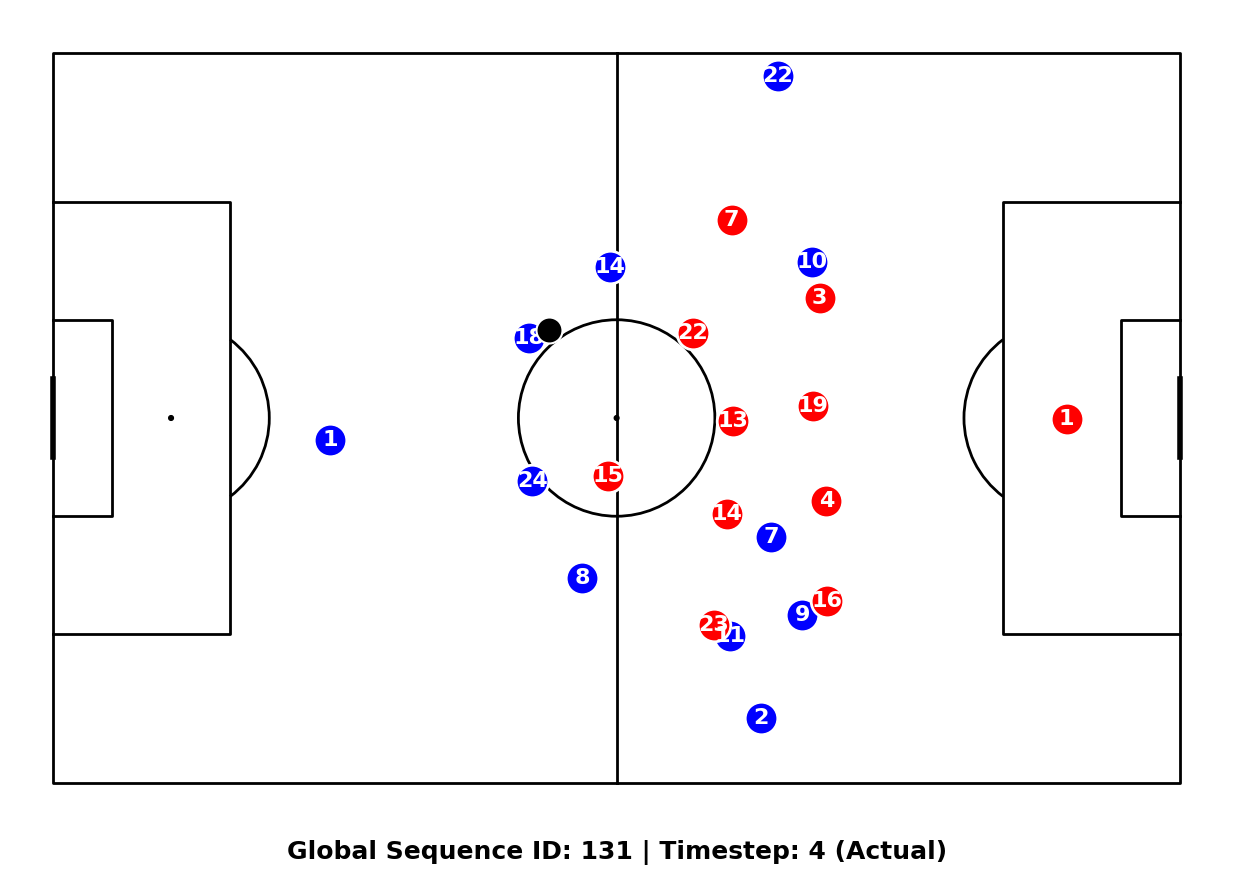

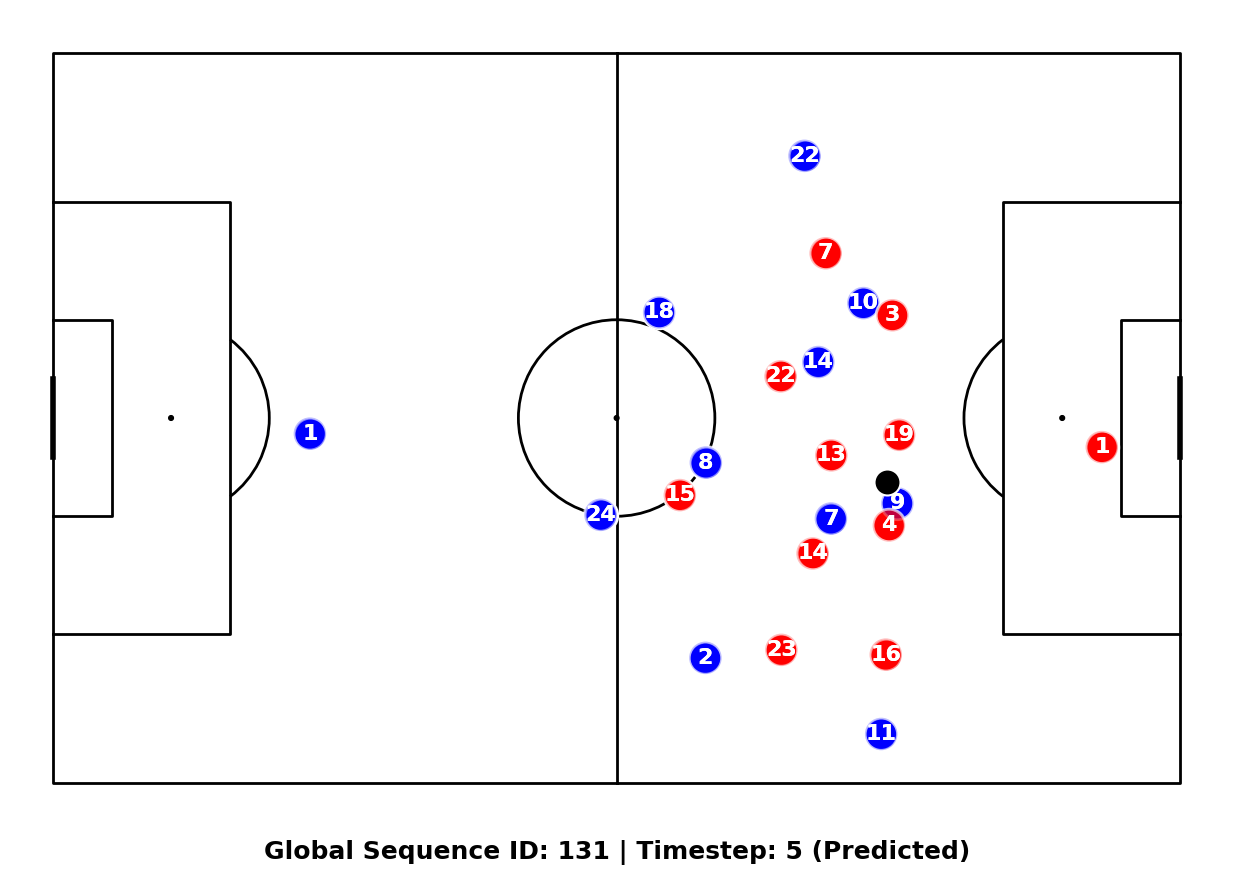

In [ ]:
# FOOTBALL PITCH VISUALIZATION

!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/pitch_plot/sequence_ball_locations.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_131 = merged_df[merged_df['global_sequence_id'] == 131].copy()

seq_131['x_plot'] = seq_131['x'] + 52.5
seq_131['y_plot'] = seq_131['y'] + 34
seq_131['ball_x_plot'] = seq_131['ball_x'] + 52.5
seq_131['ball_y_plot'] = seq_131['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title, is_predicted=False):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if is_predicted:
        pitch.scatter(
            data['x_plot'],
            data['y_plot'],
            s=550,
            color=['blue' if t == 'H' else 'red' for t in data['team']],
            edgecolor='white',
            linewidth=2,
            alpha=0.5,
            ax=ax,
            zorder=3
        )
        for _, player in data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t4_actual = seq_131[(seq_131['timestep'] == 4) & (seq_131['is_predicted'] == 0)]
if not t4_actual.empty:
    create_pitch_visualization(
        t4_actual,
        "Global Sequence ID: 131 | Timestep: 4 (Actual)"
    )

t5_predicted = seq_131[(seq_131['timestep'] == 5) & (seq_131['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 131 | Timestep: 5 (Predicted)",
        is_predicted=True
    )

### **goal_shoot**

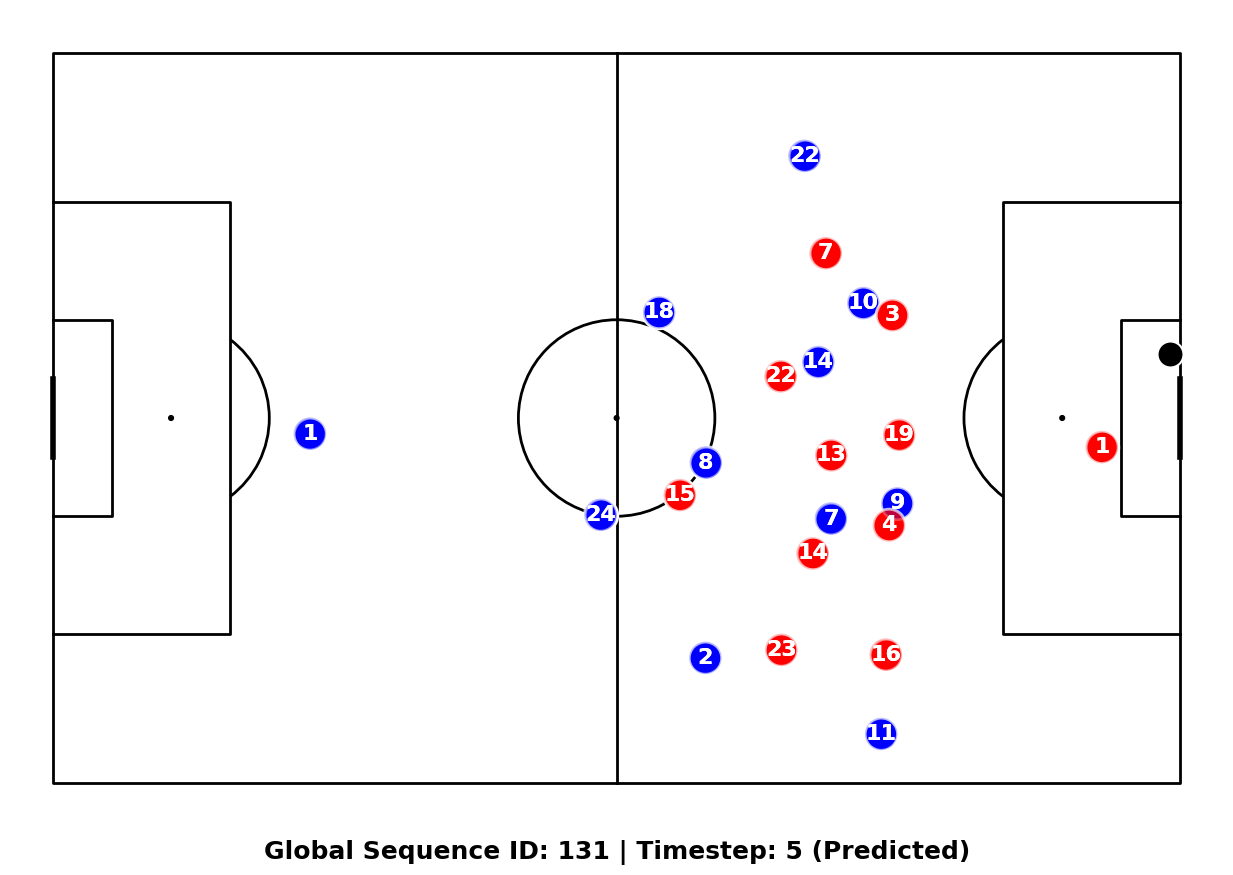

In [ ]:
!pip install mplsoccer matplotlib numpy pandas -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch

players_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/prediction/predictions/predicted_players_scenario_1_116_10.csv')
ball_df = pd.read_csv('/content/drive/MyDrive/Pass2Formation_Methodology/FIFA 2022/Different Play Scenarios/Seq 131 Assist Scenario/pass_assist_18_9/goal_shoot/sequence_ball_locations_goal_shoot.csv')

merged_df = pd.merge(
    players_df,
    ball_df[['global_sequence_id', 'timestep', 'ball_x', 'ball_y']],
    on=['global_sequence_id', 'timestep'],
    how='inner'
)

seq_131 = merged_df[merged_df['global_sequence_id'] == 131].copy()

seq_131['x_plot'] = seq_131['x'] + 52.5
seq_131['y_plot'] = seq_131['y'] + 34
seq_131['ball_x_plot'] = seq_131['ball_x'] + 52.5
seq_131['ball_y_plot'] = seq_131['ball_y'] + 34

pitch = Pitch(
    pitch_type='custom',
    pitch_length=105,
    pitch_width=68,
    goal_type='line',
    linewidth=2,
    line_color='black',
    half=False
)

def create_pitch_visualization(data, title, is_predicted=False):
    fig, ax = pitch.draw(figsize=(14, 9))

    home_mask = data['team'] == 'H'
    if home_mask.any():
        home_data = data[home_mask]
        pitch.scatter(
            home_data['x_plot'],
            home_data['y_plot'],
            s=550,
            color='blue',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in home_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    away_mask = data['team'] == 'A'
    if away_mask.any():
        away_data = data[away_mask]
        pitch.scatter(
            away_data['x_plot'],
            away_data['y_plot'],
            s=550,
            color='red',
            edgecolor='white',
            linewidth=2,
            alpha=1.0,
            ax=ax,
            zorder=3
        )
        for _, player in away_data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if is_predicted:
        pitch.scatter(
            data['x_plot'],
            data['y_plot'],
            s=550,
            color=['blue' if t == 'H' else 'red' for t in data['team']],
            edgecolor='white',
            linewidth=2,
            alpha=0.5,
            ax=ax,
            zorder=3
        )
        for _, player in data.iterrows():
            ax.text(
                player['x_plot'],
                player['y_plot'],
                str(int(player['jerseynum'])),
                color='white',
                ha='center',
                va='center',
                fontsize=16,
                fontweight='bold',
                zorder=4
            )

    if not data.empty:
        ball_x = data['ball_x_plot'].iloc[0]
        ball_y = data['ball_y_plot'].iloc[0]
        pitch.scatter(
            ball_x,
            ball_y,
            s=350,
            color='black',
            edgecolor='white',
            linewidth=1.5,
            ax=ax,
            zorder=5
        )

    plt.figtext(
        0.5,
        0.04,
        title,
        ha='center',
        fontsize=18,
        fontweight='bold'
    )

    plt.tight_layout(rect=[0, 0.06, 1, 1])
    plt.show()

t5_predicted = seq_131[(seq_131['timestep'] == 5) & (seq_131['is_predicted'] == 1)]
if not t5_predicted.empty:
    create_pitch_visualization(
        t5_predicted,
        "Global Sequence ID: 131 | Timestep: 5 (Predicted)",
        is_predicted=True
    )